# Lending Club Loan Data Analysis
We analyzed real data of Lend Club loan applications from 2007 to Q2 2018. The dataset has around 2 million examples and 152 raw features. We aimed at building ML models to predict the default probability of a given loan applicant. Extensive exploratory data analysis was performed to gain insights from the data. Logistic regression (as a baseline) and a variety of boosting tree models (GBM from scikit-learn, xgb and lightgbm) were used as candidates to seek the best model possible.

# 1.0 Load data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_rows', 200)
pd.set_option('colwidth', -1)

In [2]:
df_full = pd.read_csv('/Users/Xiao/ML Projects/Datasets/accepted_2007_to_2018Q2.csv')
data_dict = pd.read_excel('/Users/Xiao/ML Projects/Datasets/LCDataDictionary.xlsx', sheet_name = 'LoanStats')

In [3]:
df_full.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [4]:
df_full.shape

(2004091, 151)

In [5]:
df_full.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


# 1.1 Understand LC loan policy change

In [7]:
# Look at the distribution of loan status

df_full['loan_status'].value_counts(dropna = False)

Current                                                1108697
Fully Paid                                             673112 
Charged Off                                            170822 
Late (31-120 days)                                     27678  
In Grace Period                                        13775  
Late (16-30 days)                                      7157   
Does not meet the credit policy. Status:Fully Paid     1988   
Does not meet the credit policy. Status:Charged Off    761    
Default                                                72     
NaN                                                    29     
Name: loan_status, dtype: int64

In [8]:
# investigate already issued loans that don't meet current LC credit policy

policy_status_mapper = lambda x: np.isin(x, ['Does not meet the credit policy. Status:Fully Paid',
                                             'Does not meet the credit policy. Status:Charged Off'])
df_full['not_meet_policy'] = df_full['loan_status'].map(policy_status_mapper, na_action = 'ignore')
df_full['not_meet_policy'].value_counts(dropna = False)

False    2001313
True     2749   
NaN      29     
Name: not_meet_policy, dtype: int64

In [9]:
# investigate the following key features for loan application: 
# issue_year, fico_range_high, annual_inc, inq_last_6mths, dti, earliest_cr_line

# Convert issue date to issue year

df_full['issue_year'] = df_full['issue_d'].map(lambda x: x[4:8], na_action = 'ignore')
df_full['issue_year'].value_counts(dropna = False)

2017    443579
2016    434407
2015    421095
2018    238636
2014    235629
2013    134814
2012    53367 
2011    21721 
2010    12537 
2009    5281  
2008    2393  
2007    603   
NaN     29    
Name: issue_year, dtype: int64

In [10]:
df_full[['fico_range_high','annual_inc','dti','inq_last_6mths']].describe()

,fico_range_high,annual_inc,dti,inq_last_6mths
count,2.004062e+06,2.004058e+06,2.002895e+06,2.004032e+06
mean,7.016788e+02,7.754658e+04,1.869026e+01,5.954416e-01
std,3.259612e+01,1.148550e+05,1.318031e+01,9.037303e-01
min,6.140000e+02,0.000000e+00,-1.000000e+00,0.000000e+00
25%,6.740000e+02,4.600000e+04,1.192000e+01,0.000000e+00
50%,6.940000e+02,6.500000e+04,1.783000e+01,0.000000e+00
75%,7.190000e+02,9.200000e+04,2.441000e+01,1.000000e+00
max,8.500000e+02,1.100000e+08,9.990000e+02,3.300000e+01


In [11]:
# parse issue_d and earliest_cr_line to datetime object

df_full['issue_d'] = pd.to_datetime(df_full['issue_d'], format = '%b-%Y')
df_full['earliest_cr_line'] = pd.to_datetime(df_full['earliest_cr_line'], format = '%b-%Y')

In [12]:
# for examples where issue_d is missing, the loan_status is also missing

df_full[df_full['issue_d'].isnull()]['loan_status'].value_counts(dropna = False)

NaN    29
Name: loan_status, dtype: int64

In [13]:
# for examples where earliest_cr_line is missing, either the loan_status is also missing
# or the loan_status does not meet current credit policy, so we can safely drop all examples
# that have missing loan_status

df_full[df_full['earliest_cr_line'].isnull()]['loan_status'].value_counts(dropna = False)

NaN                                                    29
Does not meet the credit policy. Status:Fully Paid     26
Does not meet the credit policy. Status:Charged Off    3 
Name: loan_status, dtype: int64

In [14]:
df_full.dropna(subset = ['loan_status'], inplace = True)

In [15]:
# for missing earliest_cr_line, assume the earliest_cr_line is the same as the issue_d

df_full['earliest_cr_line'].fillna(df_full['issue_d'], inplace = True)

In [16]:
# create a new feature to represent the credit history length in months until issue_d

from dateutil.relativedelta import relativedelta
diff_to_month_mapper = lambda x: relativedelta(x[0], x[1]).years*12 + relativedelta(x[0], x[1]).months

df_full['cr_history_length'] = df_full[['issue_d','earliest_cr_line']].apply(diff_to_month_mapper, axis = 1)
df_full['cr_history_length'].describe()

count    2.004062e+06
mean     1.972369e+02
std      9.181796e+01
min      0.000000e+00
25%      1.360000e+02
50%      1.790000e+02
75%      2.440000e+02
max      9.990000e+02
Name: cr_history_length, dtype: float64

In [17]:
df_full['issue_year'].value_counts(dropna = False)

2017    443579
2016    434407
2015    421095
2018    238636
2014    235629
2013    134814
2012    53367 
2011    21721 
2010    12537 
2009    5281  
2008    2393  
2007    603   
Name: issue_year, dtype: int64

In [18]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [19]:
def policy_change_plot(col_name, bins = None):
    if bins != None:
        df_full[col_name + ' : bins'] = pd.cut(df_full[col_name], bins)
        df = df_full.groupby([col_name + ' : bins'])['not_meet_policy'].value_counts(normalize = True).rename('percentage').reset_index()
    else:
        df = df_full.groupby([col_name])['not_meet_policy'].value_counts(normalize = True).rename('percentage').reset_index()
    sns.barplot(x = df.columns[0], y = 'percentage', hue = 'not_meet_policy', data = df, palette = 'husl')
    plt.xticks(rotation = 30)
    plt.show()
    

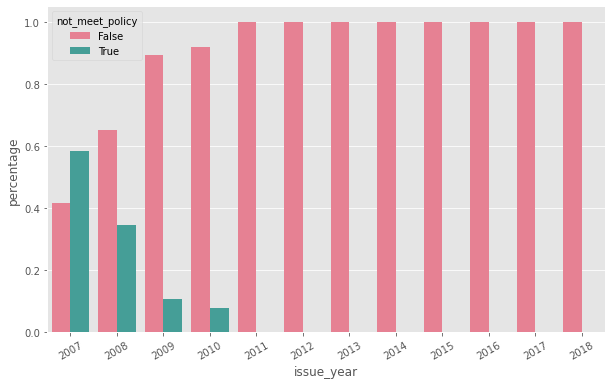

In [20]:
# credit policy change occurred post year 2010

policy_change_plot('issue_year')

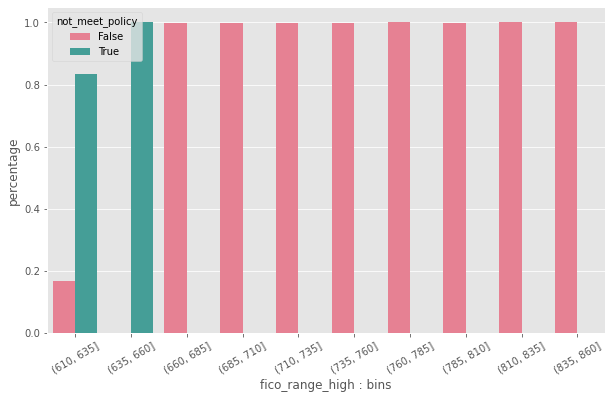

In [21]:
# Looks like 660 is the new FICO threshold in updated credit policy

policy_change_plot('fico_range_high', bins = range(610, 885, 25))

In [22]:
df_full['annual_inc'].describe()

count    2.004058e+06
mean     7.754658e+04
std      1.148550e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.200000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

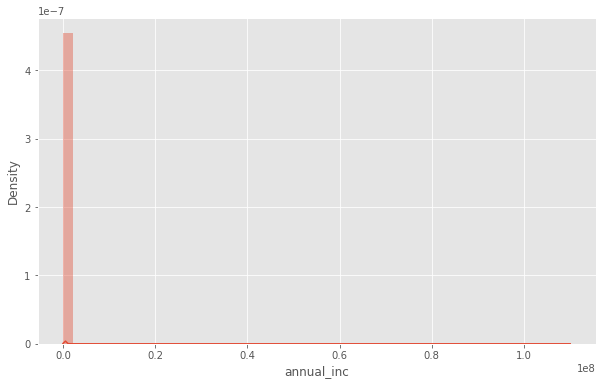

In [23]:
# annual income is highly skewed due to some high reported incomes

sns.distplot(df_full['annual_inc'])
plt.show()

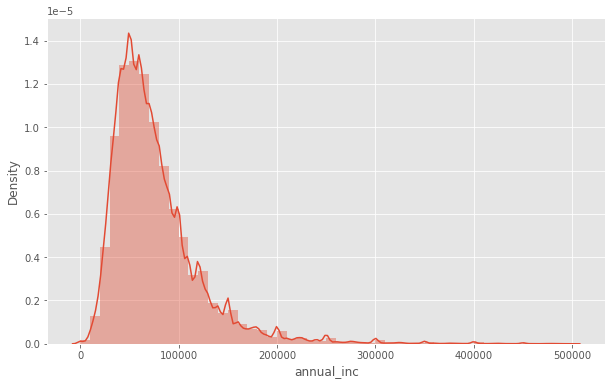

In [24]:
sns.distplot(df_full[df_full['annual_inc'] < 5.0e+05]['annual_inc'])
plt.show()

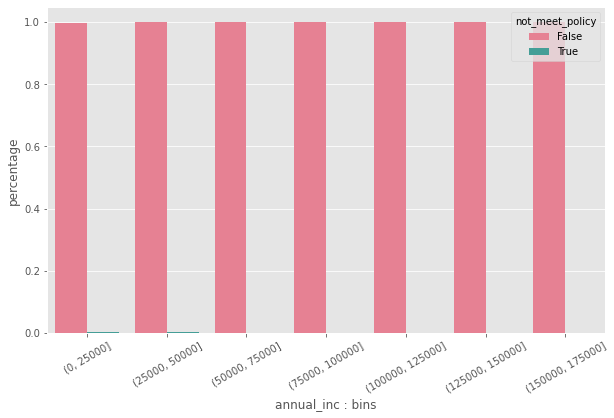

In [25]:
# looks like annual income is not a factor considered in the credit policy change

policy_change_plot('annual_inc', bins = range(0, 200000, 25000))

In [26]:
df_full['dti'].describe()

count    2.002895e+06
mean     1.869026e+01
std      1.318031e+01
min     -1.000000e+00
25%      1.192000e+01
50%      1.783000e+01
75%      2.441000e+01
max      9.990000e+02
Name: dti, dtype: float64

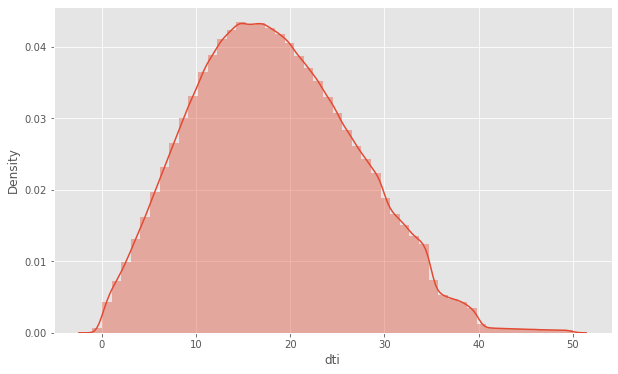

In [27]:
# most dti values are distributed btw 0 and 40

sns.distplot(df_full[df_full['dti'] < 50]['dti'])
plt.show()

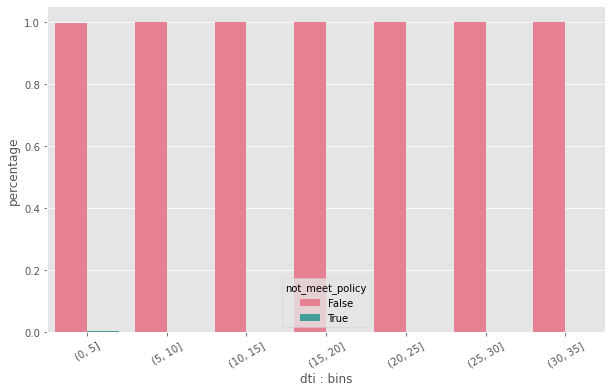

In [28]:
# looks like dti is not a factor considered in the credit policy change

policy_change_plot('dti', bins = range(0, 40, 5))

In [29]:
df_full['inq_last_6mths'].describe()

count    2.004032e+06
mean     5.954416e-01
std      9.037303e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.300000e+01
Name: inq_last_6mths, dtype: float64

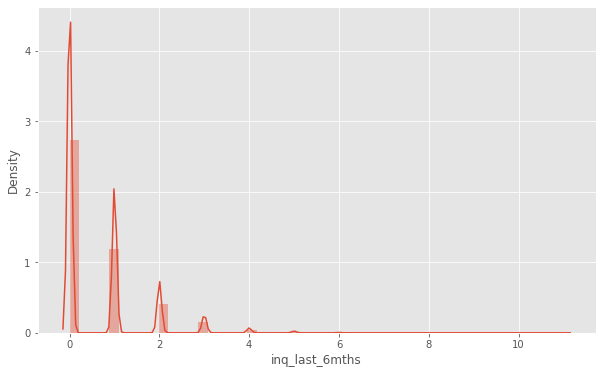

In [30]:
# inq_last_6mths is mostly distributed at 0, 1, 2, 3, 4

sns.distplot(df_full[df_full['inq_last_6mths'] < 12]['inq_last_6mths'].dropna())
plt.show()

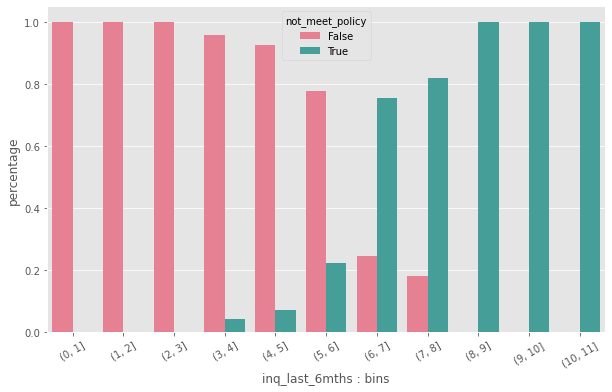

In [31]:
# number of inquries in the last 6 months is a key factor considered in the credit policy change

policy_change_plot('inq_last_6mths', bins = range(0, 12))

In [32]:
df_full['cr_history_length'].describe()

count    2.004062e+06
mean     1.972369e+02
std      9.181796e+01
min      0.000000e+00
25%      1.360000e+02
50%      1.790000e+02
75%      2.440000e+02
max      9.990000e+02
Name: cr_history_length, dtype: float64

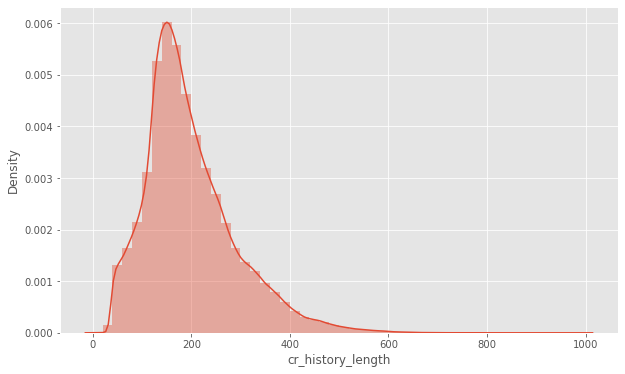

In [33]:
#credit history length is close to normal distribution

sns.distplot(df_full['cr_history_length'])
plt.show()

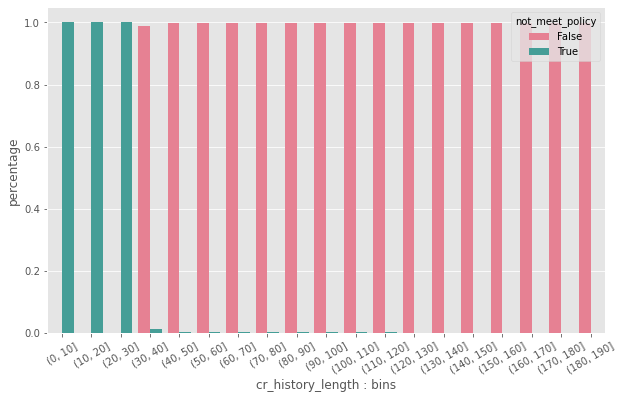

In [34]:
# credit history length is a key factor considered in the credit policy change

policy_change_plot('cr_history_length', bins = range(0, 200, 10))

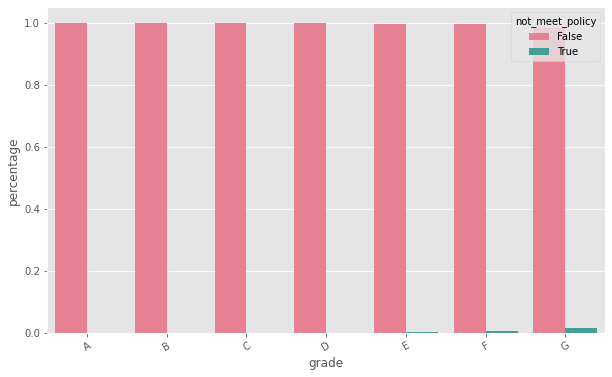

In [35]:
# grade is not a factor considered in the credit policy change

policy_change_plot('grade')

# 1.2 EDA 

In [36]:
df_full.shape

(2004062, 159)

In [37]:
df_full['loan_status'].value_counts(dropna = False)

Current                                                1108697
Fully Paid                                             673112 
Charged Off                                            170822 
Late (31-120 days)                                     27678  
In Grace Period                                        13775  
Late (16-30 days)                                      7157   
Does not meet the credit policy. Status:Fully Paid     1988   
Does not meet the credit policy. Status:Charged Off    761    
Default                                                72     
Name: loan_status, dtype: int64

In [38]:
# Only keep examples with a loan status of Fully Paid or Charged Off for modeling purpose
# Also include those that do not meet current credit policy

df_new = df_full[df_full['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default',
                                                             'Does not meet the credit policy. Status:Fully Paid',
                                                             'Does not meet the credit policy. Status:Charged Off'])]

In [39]:
# label target variables

loan_status_mapper = lambda x: int(np.isin(x, ['Charged Off', 'Default',
                                               'Does not meet the credit policy. Status:Charged Off']))
df_new['loan_status'] = df_new['loan_status'].map(loan_status_mapper)

In [40]:
df_new.shape

(846755, 159)

In [41]:
df_new['loan_status'].value_counts(dropna = False)

0    675100
1    171655
Name: loan_status, dtype: int64

In [42]:
df_new.reset_index(drop = True, inplace = True)

In [43]:
# The following features are chosen initially

features_to_keep = ['loan_amnt','funded_amnt','funded_amnt_inv','purpose','term','int_rate','grade','sub_grade',
                    'installment','emp_title', 'home_ownership','emp_length','annual_inc','dti','addr_state','fico_range_high',
                    'fico_range_low','cr_history_length','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util',
                    'total_acc','loan_status','collections_12_mths_ex_med',
                    'verification_status','mths_since_last_delinq','mths_since_last_record',
                    'mths_since_last_major_derog','out_prncp','out_prncp_inv']



In [44]:
data_dict[data_dict['LoanStatNew'].isin(features_to_keep)]

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan application
4,annual_inc,The self-reported annual income provided by the borrower during registration.
12,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
20,emp_title,The job title supplied by the Borrower when applying for the loan.*
21,fico_range_high,The upper boundary range the borrower’s FICO at loan origination belongs to.
22,fico_range_low,The lower boundary range the borrower’s FICO at loan origination belongs to.
23,funded_amnt,The total amount committed to that loan at that point in time.
24,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.


In [45]:
df = df_new[features_to_keep]

In [46]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,purpose,term,int_rate,grade,sub_grade,installment,emp_title,...,revol_util,total_acc,loan_status,collections_12_mths_ex_med,verification_status,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog,out_prncp,out_prncp_inv
0,15000.0,15000.0,15000.0,debt_consolidation,60 months,12.39,C,C1,336.64,MANAGEMENT,...,29.0,17.0,0,0.0,Source Verified,NaN,NaN,NaN,0.0,0.0
1,10400.0,10400.0,10400.0,credit_card,36 months,6.99,A,A3,321.08,Truck Driver Delivery Personel,...,31.6,36.0,1,0.0,Not Verified,42.0,NaN,59.0,0.0,0.0
2,21425.0,21425.0,21425.0,credit_card,60 months,15.59,D,D1,516.36,Programming Analysis Supervisor,...,76.2,35.0,0,0.0,Source Verified,60.0,NaN,74.0,0.0,0.0
3,7650.0,7650.0,7650.0,debt_consolidation,36 months,13.66,C,C3,260.20,Technical Specialist,...,91.9,20.0,1,0.0,Source Verified,NaN,NaN,NaN,0.0,0.0
4,9600.0,9600.0,9600.0,debt_consolidation,36 months,13.66,C,C3,326.53,Admin Specialist,...,59.4,44.0,0,0.0,Source Verified,NaN,NaN,NaN,0.0,0.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846755 entries, 0 to 846754
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    846755 non-null  float64
 1   funded_amnt                  846755 non-null  float64
 2   funded_amnt_inv              846755 non-null  float64
 3   purpose                      846755 non-null  object 
 4   term                         846755 non-null  object 
 5   int_rate                     846755 non-null  float64
 6   grade                        846755 non-null  object 
 7   sub_grade                    846755 non-null  object 
 8   installment                  846755 non-null  float64
 9   emp_title                    795750 non-null  object 
 10  home_ownership               846755 non-null  object 
 11  emp_length                   802232 non-null  object 
 12  annual_inc                   846751 non-null  float64
 13 

In [48]:
df.nunique()

loan_amnt                      1511  
funded_amnt                    1511  
funded_amnt_inv                9993  
purpose                        14    
term                           2     
int_rate                       648   
grade                          7     
sub_grade                      35    
installment                    73831 
emp_title                      287184
home_ownership                 6     
emp_length                     11    
annual_inc                     47159 
dti                            5361  
addr_state                     51    
fico_range_high                48    
fico_range_low                 48    
cr_history_length              723   
inq_last_6mths                 28    
open_acc                       78    
pub_rec                        30    
revol_bal                      71267 
revol_util                     1325  
total_acc                      134   
loan_status                    2     
collections_12_mths_ex_med     12    
verification

In [49]:
df.isnull().sum()[df.isnull().sum() > 0]

emp_title                      51005 
emp_length                     44523 
annual_inc                     4     
dti                            96    
inq_last_6mths                 30    
open_acc                       29    
pub_rec                        29    
revol_util                     579   
total_acc                      29    
collections_12_mths_ex_med     145   
mths_since_last_delinq         434224
mths_since_last_record         707179
mths_since_last_major_derog    634247
dtype: int64

In [50]:
# too many missing values for features mths_since_last_delinq, mths_since_last_record and 
# mths_since_last_major_derog, so drop these 3 columns

df.drop(['mths_since_last_delinq', 'mths_since_last_record', 
           'mths_since_last_major_derog'], axis = 1, inplace = True)

In [51]:
# emp_title has too many levels and the possible levels are not fixed which will create difficulty during model
# deployment, therefore, we drop this column

df['emp_title'].value_counts(dropna = False)

NaN                                51005
Teacher                            11859
Manager                            11110
Registered Nurse                   5029 
RN                                 4874 
                                   ...  
Parts Management                   1    
Highway maintenance supervisor     1    
MITA System Analyst III            1    
Driver/Service Tech                1    
Operation service managee          1    
Name: emp_title, Length: 287185, dtype: int64

In [52]:
df.drop(['emp_title'], axis = 1, inplace = True)

In [53]:
num_cols = df.columns[(df.dtypes == 'float64')|(df.dtypes == 'int64')].drop('loan_status')
cat_cols = df.columns[df.dtypes == 'object']

In [54]:
print(num_cols)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'fico_range_high', 'fico_range_low',
       'cr_history_length', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'out_prncp', 'out_prncp_inv'],
      dtype='object')


In [55]:
print(cat_cols)

Index(['purpose', 'term', 'grade', 'sub_grade', 'home_ownership', 'emp_length',
       'addr_state', 'verification_status'],
      dtype='object')


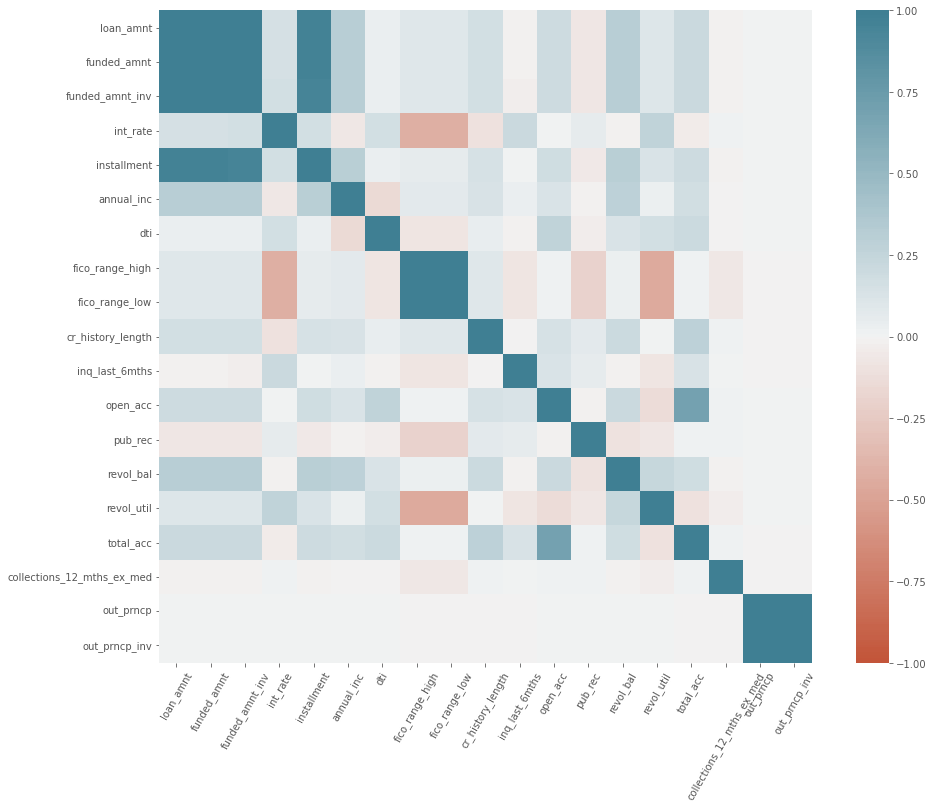

In [56]:
# create a correlation heatmap of numerical features

matplotlib.rcParams['figure.figsize'] = 16, 12

sns.heatmap(df[num_cols].corr(), 
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square = True)
plt.xticks(rotation = 60)
plt.show()

In [57]:
df[num_cols].corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,fico_range_high,fico_range_low,cr_history_length,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,out_prncp,out_prncp_inv
loan_amnt,1.000000,0.999250,0.997063,0.155667,0.953537,0.317512,0.035178,0.099768,0.099769,0.162287,-0.019642,0.192146,-0.072758,0.315628,0.105522,0.213399,-0.014305,0.006806,0.006806
funded_amnt,0.999250,1.000000,0.997989,0.155912,0.954652,0.317313,0.035878,0.098387,0.098388,0.162413,-0.020130,0.192640,-0.072378,0.315417,0.105853,0.213361,-0.014141,0.006823,0.006824
funded_amnt_inv,0.997063,0.997989,1.000000,0.156250,0.952427,0.316364,0.037860,0.097002,0.097002,0.163772,-0.024253,0.193297,-0.071274,0.313579,0.106208,0.213669,-0.013703,0.006849,0.006850
int_rate,0.155667,0.155912,0.156250,1.000000,0.160735,-0.064362,0.164230,-0.426607,-0.426610,-0.107445,0.213440,0.003540,0.056351,-0.017443,0.260306,-0.041342,0.016312,0.003465,0.003465
installment,0.953537,0.954652,0.952427,0.160735,1.000000,0.309289,0.036590,0.049555,0.049556,0.144574,0.002836,0.182303,-0.061347,0.304313,0.125685,0.191645,-0.011478,0.005521,0.005522
annual_inc,0.317512,0.317313,0.316364,-0.064362,0.309289,1.000000,-0.155916,0.076514,0.076513,0.140343,0.034148,0.132351,-0.008480,0.284815,0.029959,0.178601,-0.003148,0.001444,0.001444
dti,0.035178,0.035878,0.037860,0.164230,0.036590,-0.155916,1.000000,-0.085305,-0.085303,0.041725,-0.010043,0.262548,-0.034007,0.122851,0.164958,0.199706,-0.001059,0.001056,0.001055
fico_range_high,0.099768,0.098387,0.097002,-0.426607,0.049555,0.076514,-0.085305,1.000000,1.000000,0.097954,-0.080537,0.010067,-0.194081,0.028746,-0.460644,0.018119,-0.063472,-0.001840,-0.001840
fico_range_low,0.099769,0.098388,0.097002,-0.426610,0.049556,0.076513,-0.085303,1.000000,1.000000,0.097950,-0.080536,0.010069,-0.194083,0.028748,-0.460645,0.018120,-0.063473,-0.001840,-0.001840
cr_history_length,0.162287,0.162413,0.163772,-0.107445,0.144574,0.140343,0.041725,0.097954,0.097950,1.000000,-0.005608,0.145506,0.075154,0.201650,0.002956,0.287766,0.008146,-0.000040,-0.000040


In [58]:
# 1.remove funded_amnt, funded_amnt_inv, out_prncp, out_prncp_inv as these features are not available at
# time of loan origination. 
# 2.In addition, remove installment as this feature can be derived from loan_amnt, interest rate on the loan 
# and loan term
# 3.Fico range high and fico range low are perfectly correlated, create a derived feature using the average
# and drop these two features

df.drop(['funded_amnt','funded_amnt_inv','out_prncp','out_prncp_inv','installment'], axis = 1, inplace = True)
df['fico'] = (df['fico_range_high'] + df['fico_range_low'])/2.0
df.drop(['fico_range_high','fico_range_low'], axis = 1, inplace = True)

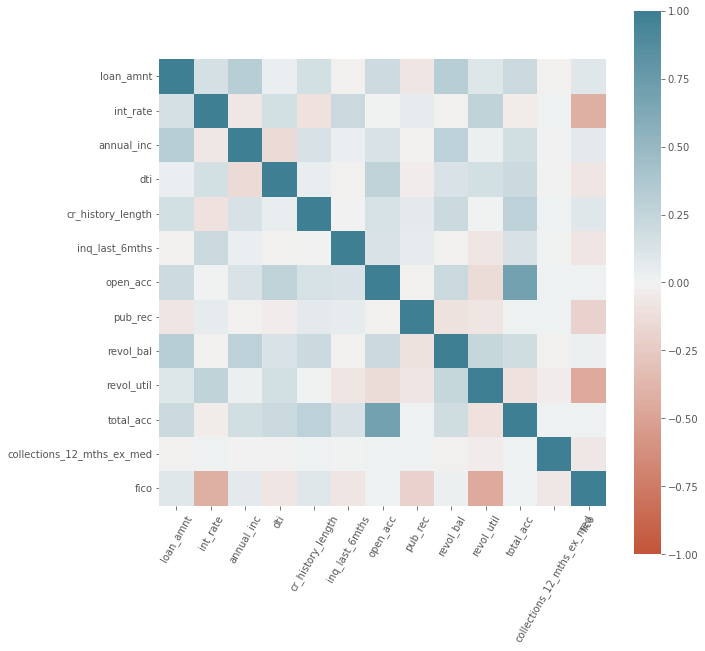

In [59]:
# update numerical features

num_cols = df.columns[(df.dtypes == 'float64')|(df.dtypes == 'int64')].drop(['loan_status'])

matplotlib.rcParams['figure.figsize'] = 10, 10
sns.heatmap(df[num_cols].corr(), 
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square = True)
plt.xticks(rotation = 60)
plt.show()

In [60]:
# look at general descriptive stats for numerical features
# some observations: 
# 1. annual income has some unusually large values, we can check if those high incomes are verified or not
# 2. dti has some unusually large values, min = -1 does not make sense
# 3. most inq_last_6mths has value of 0
# 4. most pub_rec has value of 0
# 5. revol_bal has some unusually large values
# 6. most collections_12_mths_ex_med has value of 0
# For features with highly skewed data, consider performing transformation or removing outliers, for sparse features,
# consider converting them to categorical features
df[num_cols].describe()

,loan_amnt,int_rate,annual_inc,dti,cr_history_length,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,fico
count,846755.000000,846755.000000,8.467510e+05,846659.000000,846755.000000,846725.000000,846726.000000,846726.000000,8.467550e+05,846176.000000,846726.000000,846610.000000,846755.000000
mean,14305.623203,13.491570,7.542416e+04,17.871364,192.628195,0.728768,11.511598,0.204263,1.605499e+04,52.567390,25.377248,0.014558,698.016831
std,8559.389204,4.649471,6.706684e+04,9.478072,88.348081,1.017897,5.344678,0.580027,2.192247e+04,24.512279,12.007606,0.136020,31.701431
min,500.000000,5.310000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,612.000000
25%,8000.000000,9.990000,4.510080e+04,11.580000,133.000000,0.000000,8.000000,0.000000,5.936000e+03,34.300000,17.000000,0.000000,672.000000
50%,12000.000000,13.050000,6.500000e+04,17.320000,175.000000,0.000000,11.000000,0.000000,1.110900e+04,53.200000,24.000000,0.000000,692.000000
75%,20000.000000,16.290000,9.000000e+04,23.615000,237.000000,1.000000,14.000000,0.000000,1.965550e+04,71.600000,32.000000,0.000000,712.000000
max,40000.000000,30.990000,9.550000e+06,999.000000,842.000000,33.000000,90.000000,86.000000,2.568995e+06,892.300000,176.000000,20.000000,847.500000


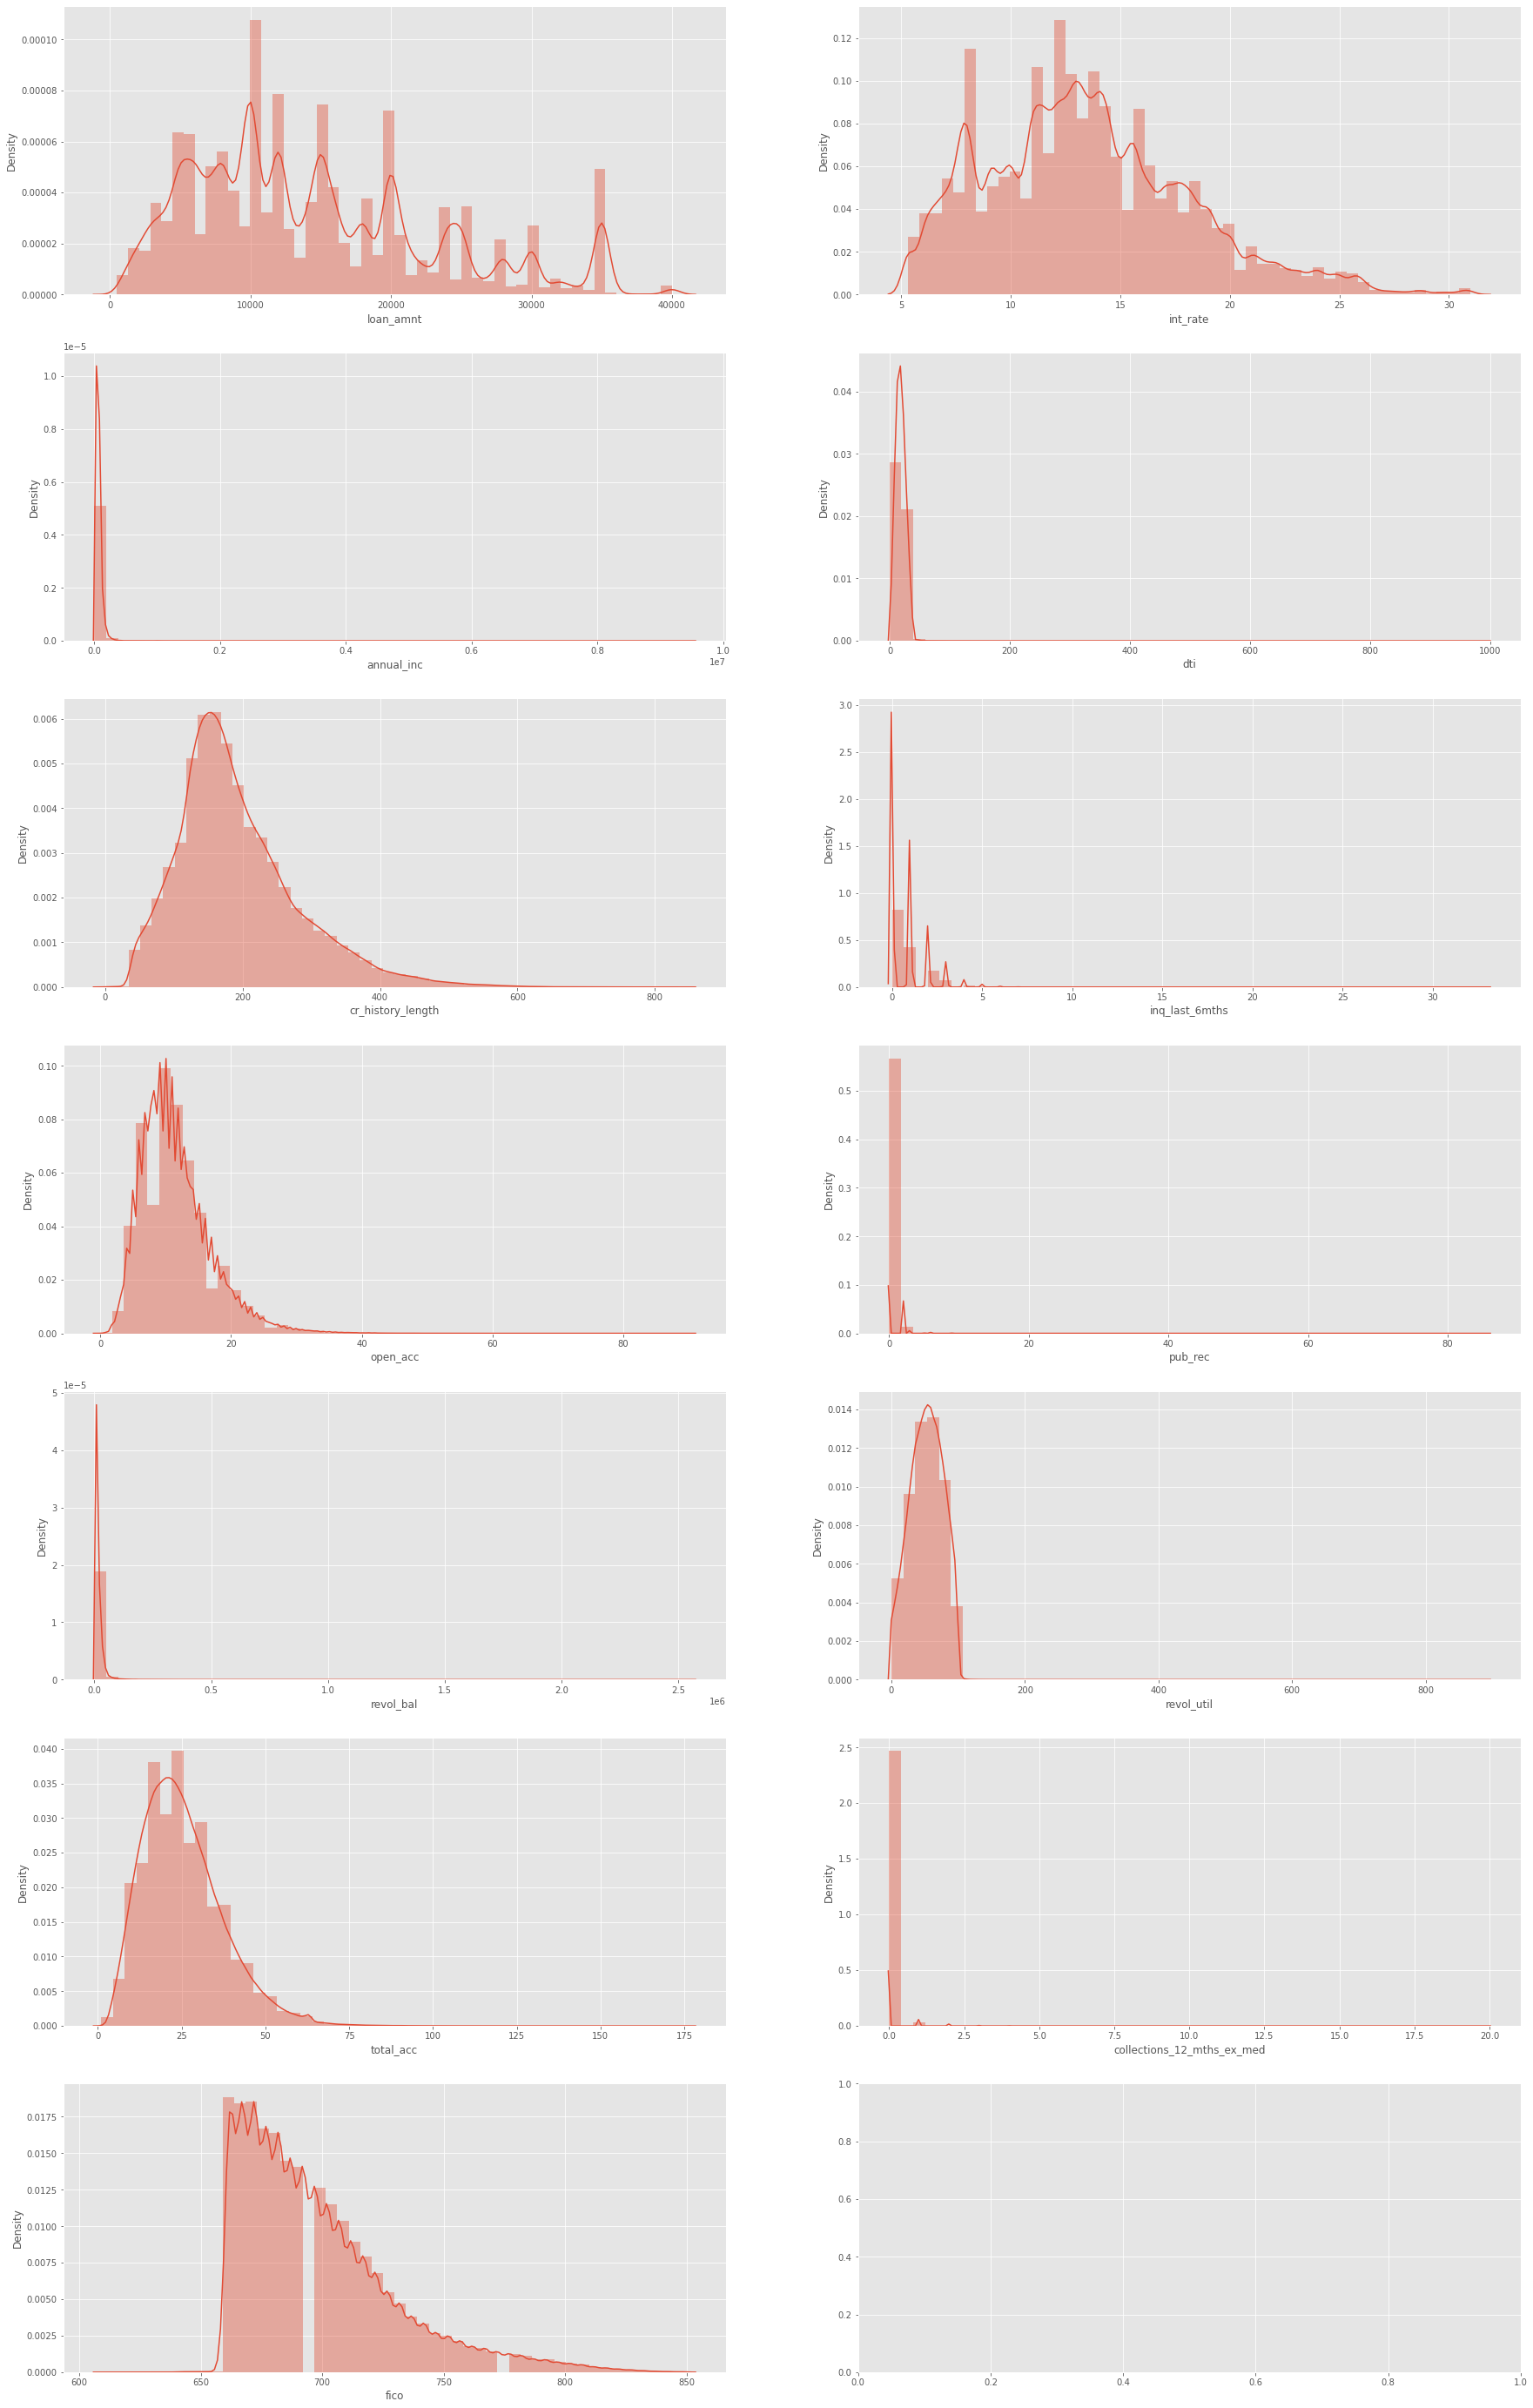

In [61]:
# plot the distribution of each numerical feature
# most numerical features have right skewed distribution: in the preprocessing step, consider removing outliers
# or performing proper transformation (standardization, log transform, etc.)

fig, axes = plt.subplots(7, 2, figsize = [30, 50])
for i, col in enumerate(num_cols):
    sns.distplot(df[col], ax = axes[i//2][i%2], kde = True)
plt.show()

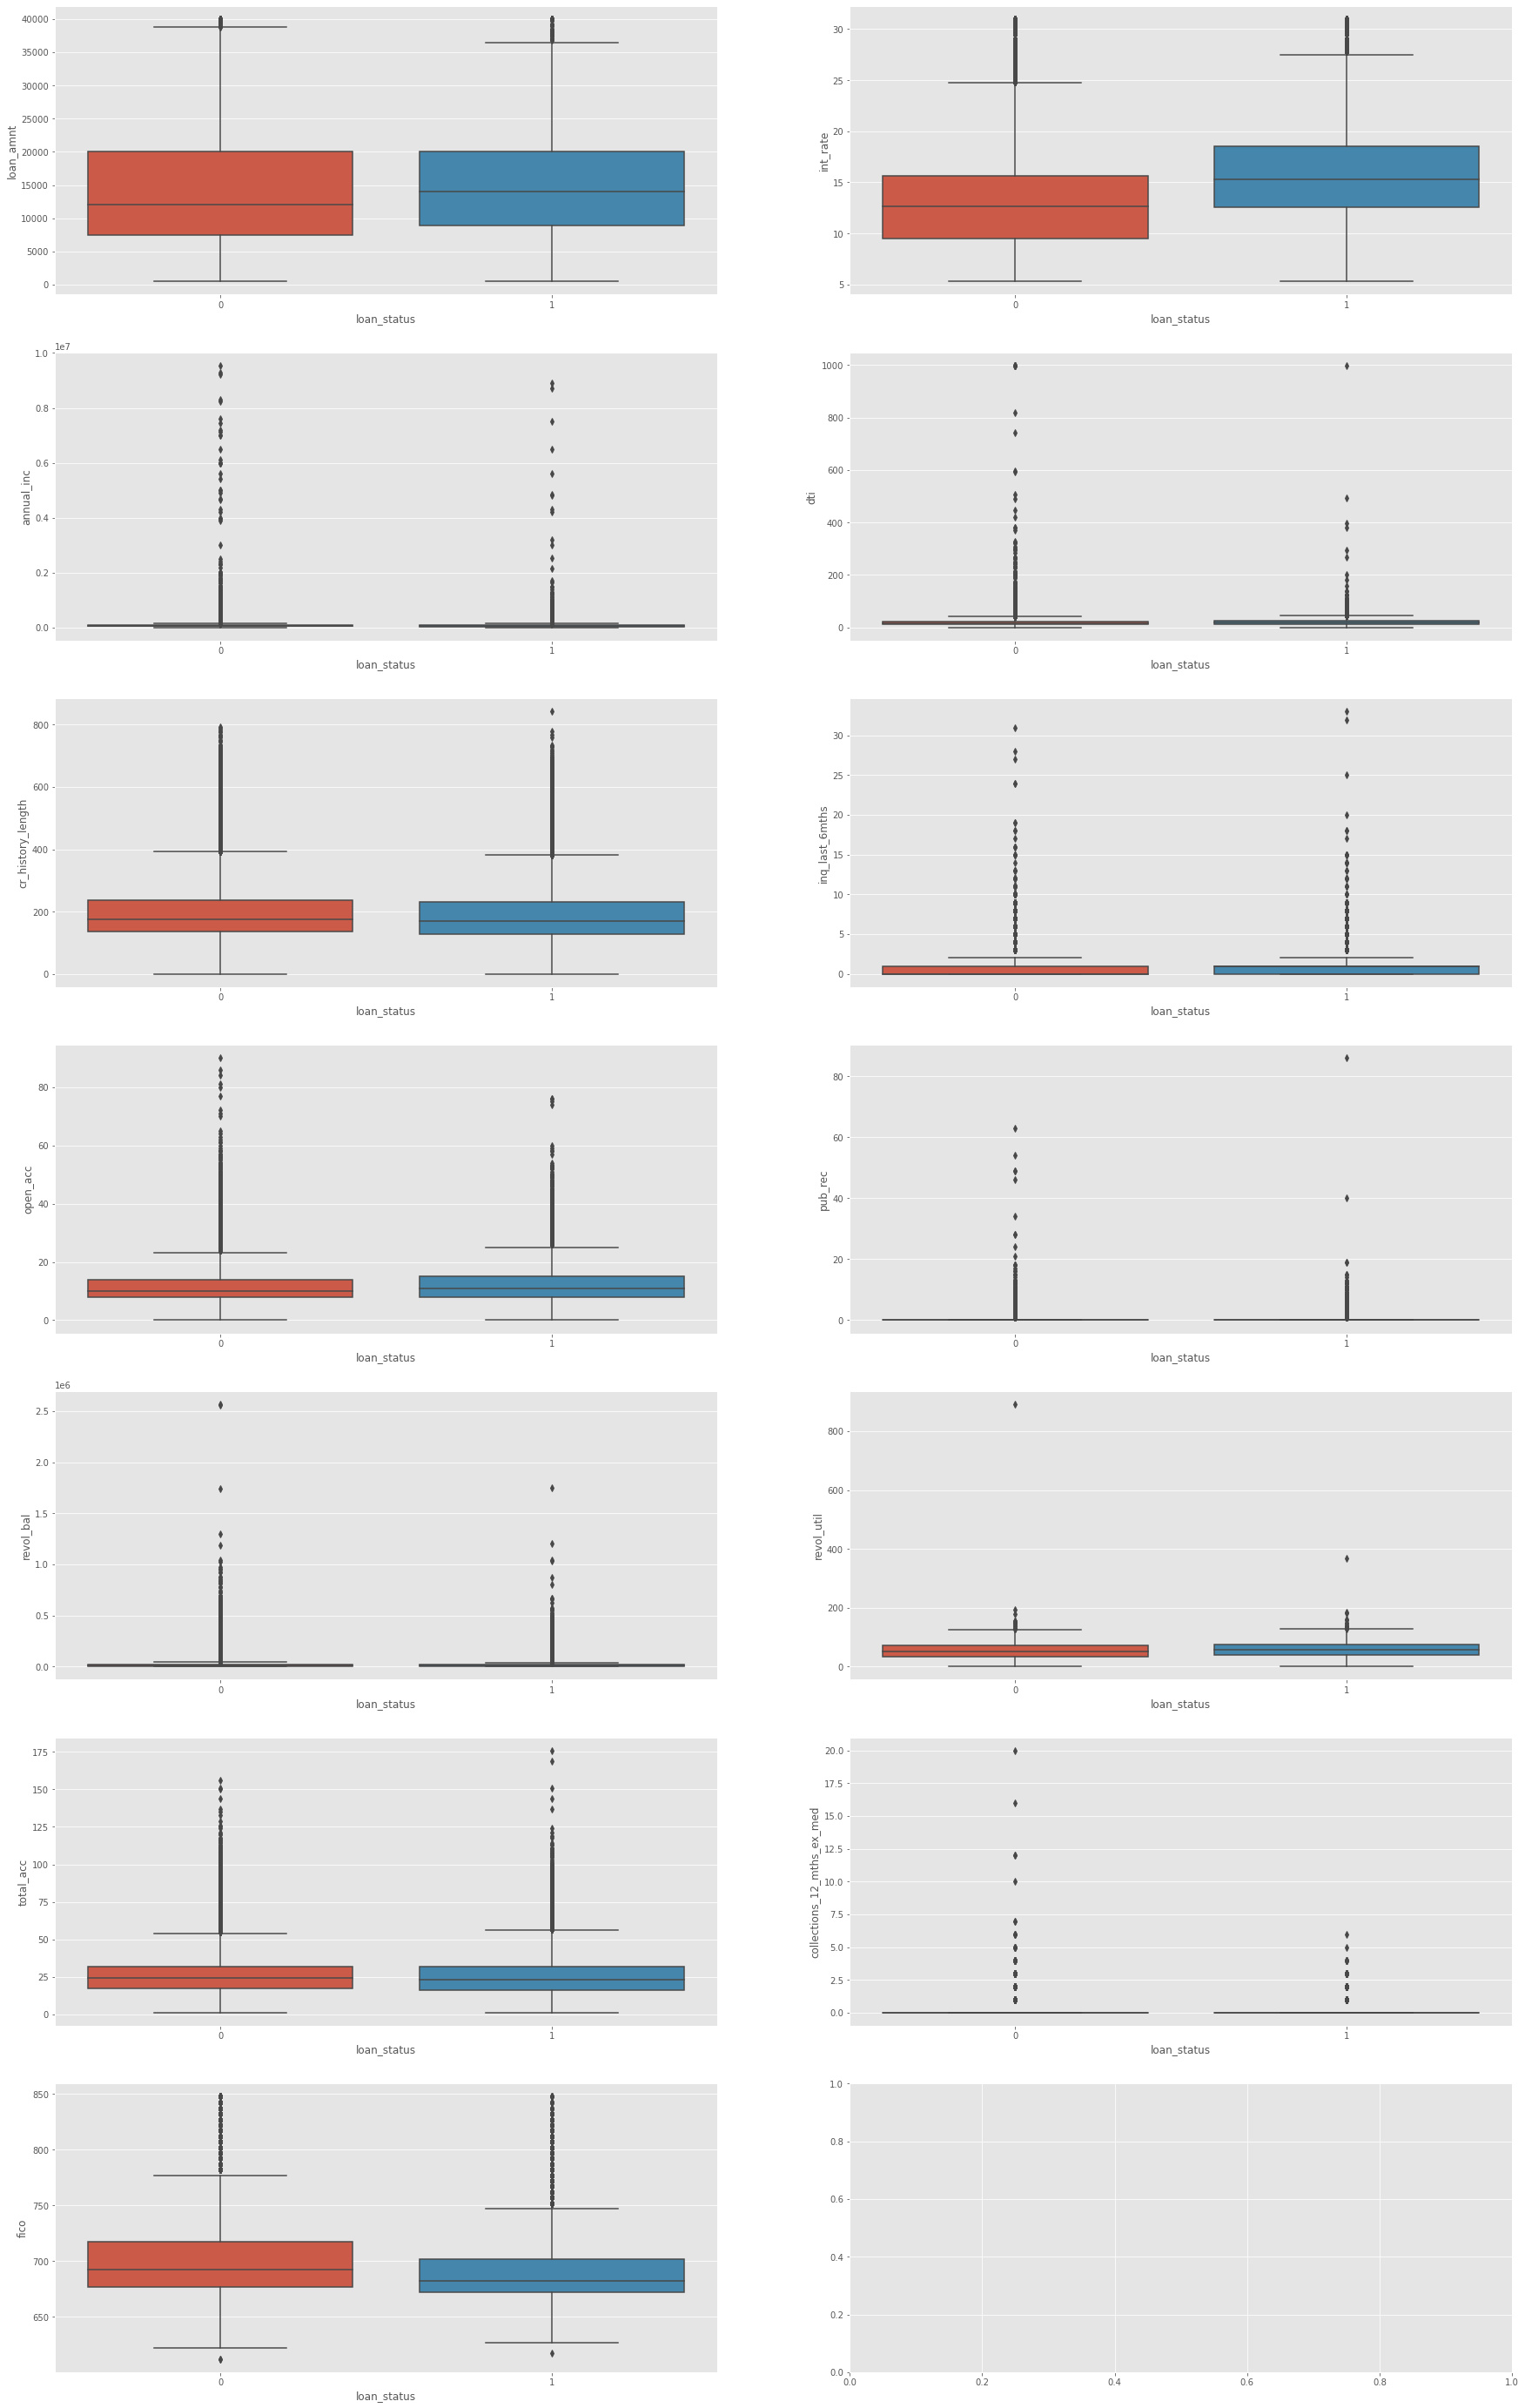

In [62]:
# Look at the target distribution with respect to each numerical feature

fig, axes = plt.subplots(7, 2, figsize = [30, 50])
for i, col in enumerate(num_cols):
    sns.boxplot(y = col, x = 'loan_status', data = df,
                 ax = axes[i//2][i%2])
plt.show()

In [63]:
# Some numerical features have many extreme values and/or are highly skewed,
# try transformation and see if we can have better visualization results

def num_col_eda(col, extreme_threshold, is_log = True):
    fig, axes = plt.subplots(1, 2, figsize = [20, 8])
    if is_log:
        sns.distplot(df['log_' + col], kde = True, ax = axes[0]).set(title = 'log ' + col + ' distribution')
    else:
        sns.distplot(df[col], kde = True, ax = axes[0]).set(title = col + ' distribution')
    sns.boxplot(data = df[df[col] < df[col].quantile(extreme_threshold)], x = 'loan_status', y = col,
               ax = axes[1]).set(title = 'lower ' + str(round(extreme_threshold*100)) + '% ' + col + ' sample' )
    plt.show()

df = df[df['dti'] >= 0] # there is one example with dti = -1 which results in infinity in log transform, remove it
for col in num_cols:
    df['log_' + col] = df[col].map(lambda x: np.log(x + 1))

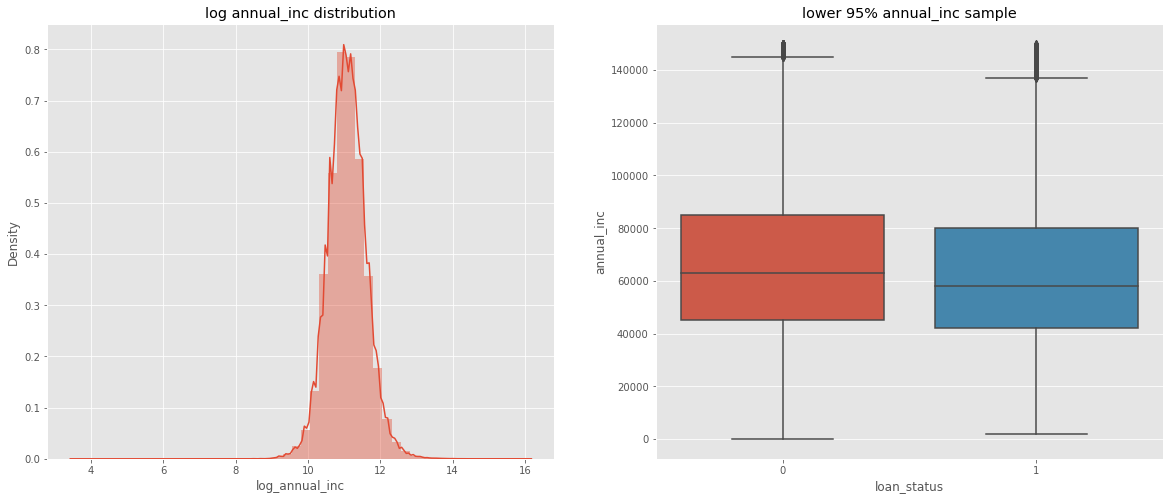

In [64]:
num_col_eda('annual_inc', 0.95)

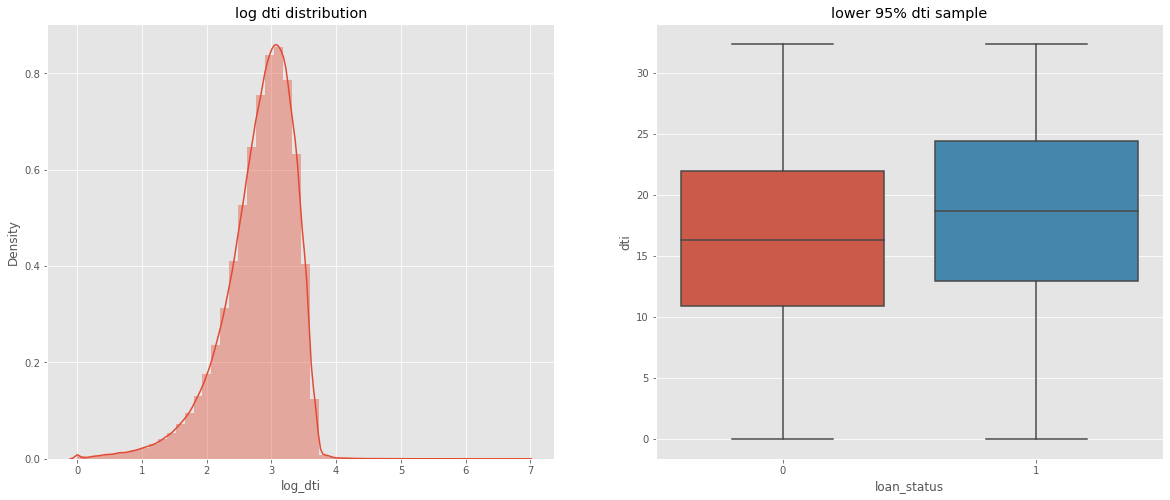

In [65]:
num_col_eda('dti', 0.95)

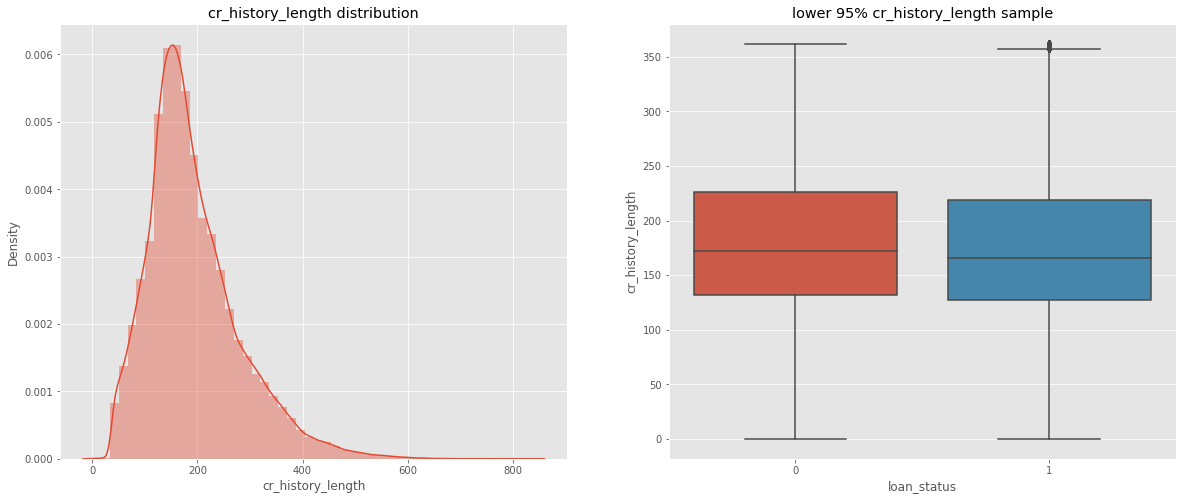

In [66]:
num_col_eda('cr_history_length', 0.95, False)

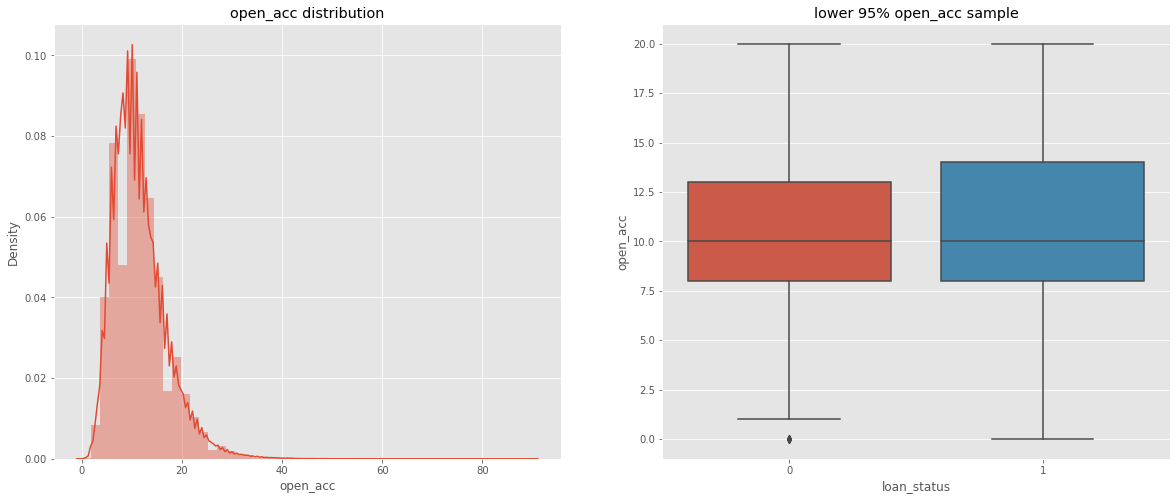

In [67]:
num_col_eda('open_acc', 0.95, False)

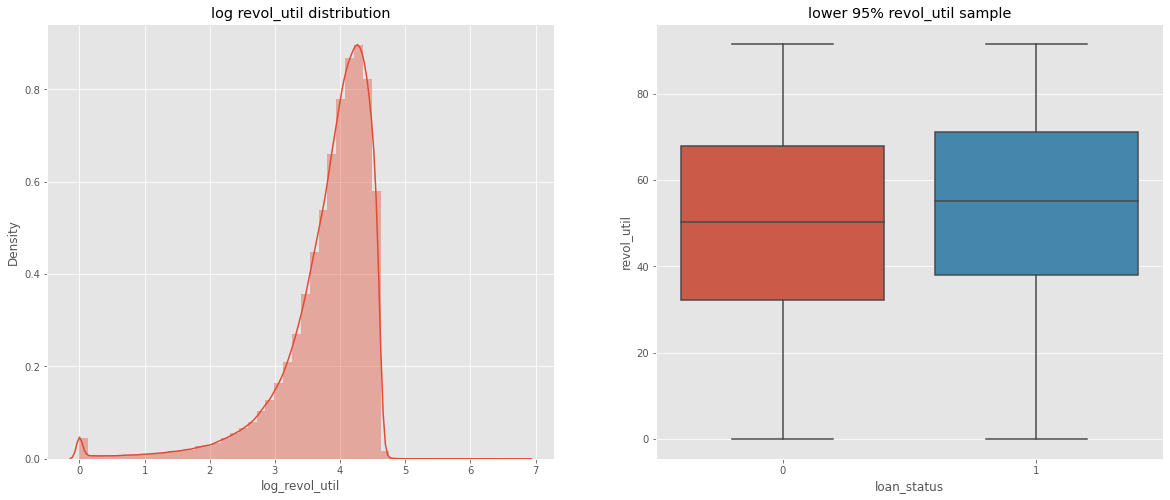

In [68]:
num_col_eda('revol_util', 0.95)

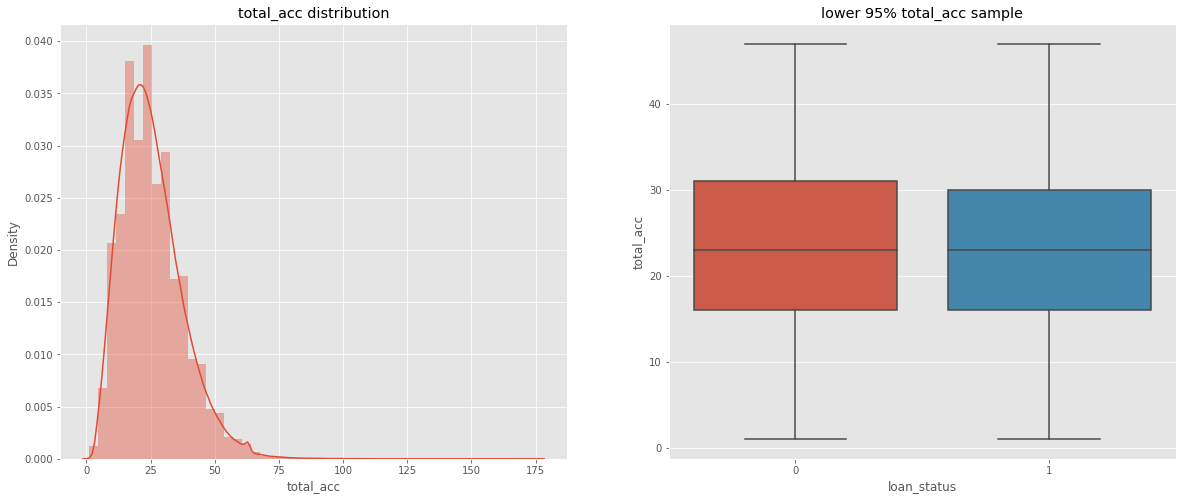

In [69]:
num_col_eda('total_acc', 0.95, False)

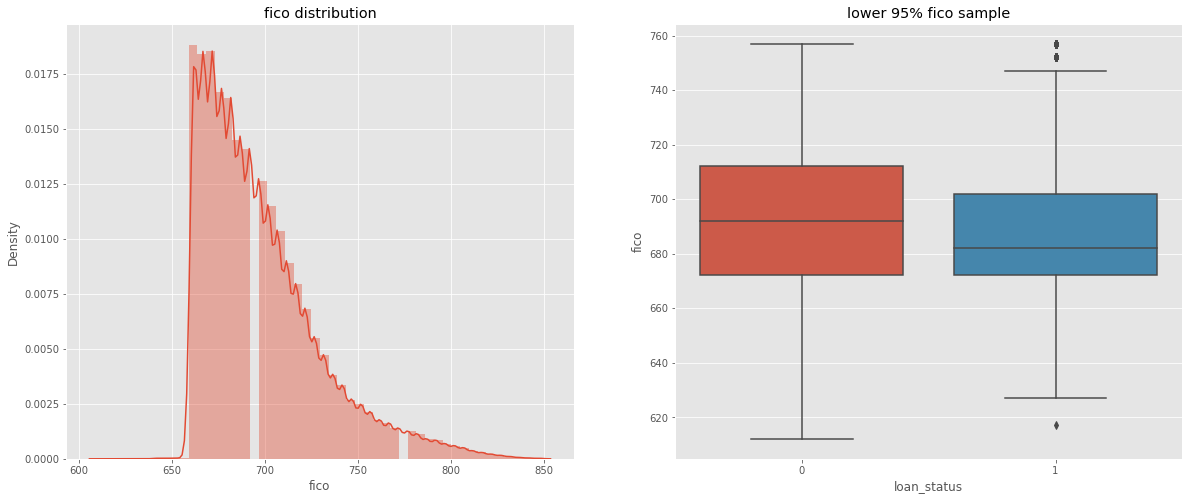

In [70]:
# there is an obvious cutoff point (around 650) of fico score for all examples. Bias will occur since
# we only include training examples for those who have been accepted for loan application. Reject inference
# should be considered. But for now, we leave it for further enhancements.

num_col_eda('fico', 0.95, False)

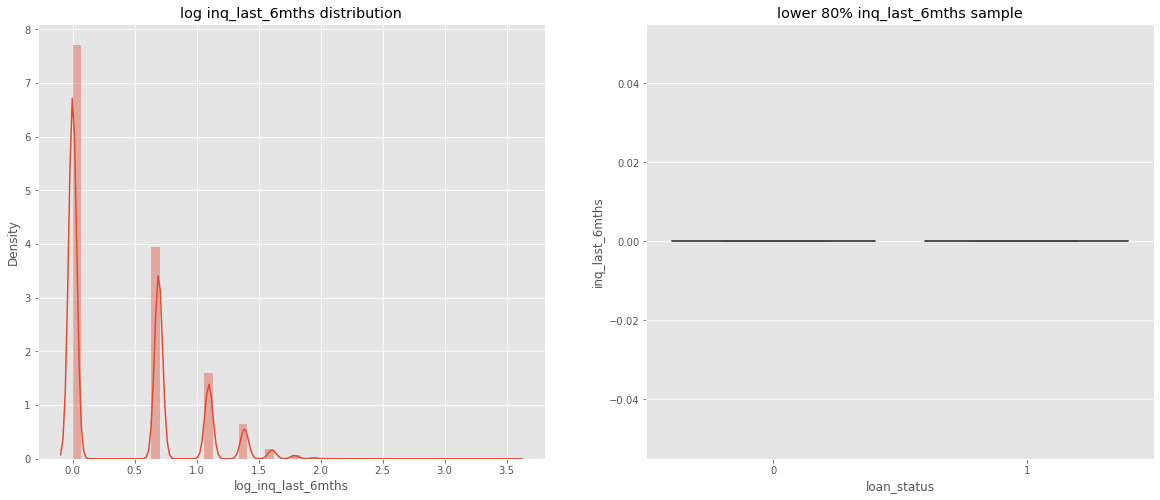

In [71]:
num_col_eda('inq_last_6mths', 0.8)

In [72]:
# Most values of inq_last_6mths are concentrated to 0, 1, 2, 3, 4. May consider grouping them and convert 
# to categorical feature
df['inq_last_6mths'].value_counts(normalize = True).cumsum()[:10]

0.0     0.544260
1.0     0.822545
2.0     0.934700
3.0     0.980046
4.0     0.993155
5.0     0.998061
6.0     0.999454
7.0     0.999685
8.0     0.999829
9.0     0.999888
10.0    0.999916
Name: inq_last_6mths, dtype: float64

In [73]:
# Looks like by coding the feature, it can better separate target variable

df['inq_last_6mths_coded'] = df['inq_last_6mths'].map(lambda x: str(x) if x <= 5 else '6+')
df.groupby('inq_last_6mths_coded')['loan_status'].value_counts(normalize = True)

inq_last_6mths_coded  loan_status
0.0                   0              0.817316
                      1              0.182684
1.0                   0              0.785980
                      1              0.214020
2.0                   0              0.763262
                      1              0.236738
3.0                   0              0.741580
                      1              0.258420
4.0                   0              0.727002
                      1              0.272998
5.0                   0              0.726463
                      1              0.273537
6+                    0              0.714115
                      1              0.285885
Name: loan_status, dtype: float64

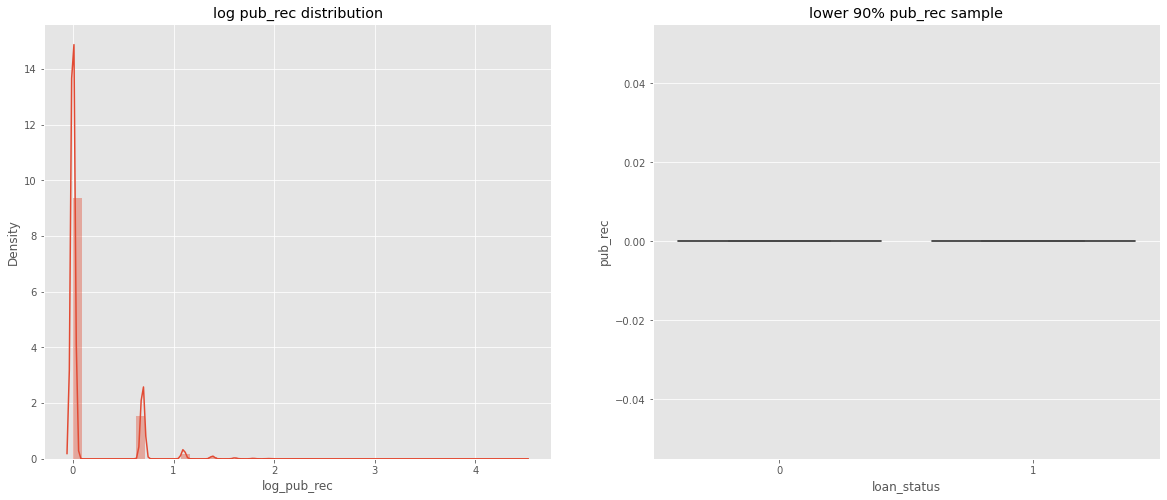

In [74]:
num_col_eda('pub_rec', 0.9)

In [75]:
# the distribution of pub_rec is too sparse and concentrated at 0
# consider coding the variable and convert it to categorical variable
df['pub_rec'].value_counts(normalize = True)[:10]

0.0     0.836664
1.0     0.138202
2.0     0.016896
3.0     0.004914
4.0     0.001677
5.0     0.000785
6.0     0.000404
7.0     0.000175
8.0     0.000106
9.0     0.000052
10.0    0.000033
Name: pub_rec, dtype: float64

In [76]:
df['pub_rec_coded'] = df['pub_rec'].map(lambda x: str(x) if x <= 2 else '3+')
df.groupby('pub_rec_coded')['loan_status'].value_counts(normalize = True)

pub_rec_coded  loan_status
0.0            0              0.801667
               1              0.198333
1.0            0              0.777875
               1              0.222125
2.0            0              0.758266
               1              0.241734
3+             0              0.755819
               1              0.244181
Name: loan_status, dtype: float64

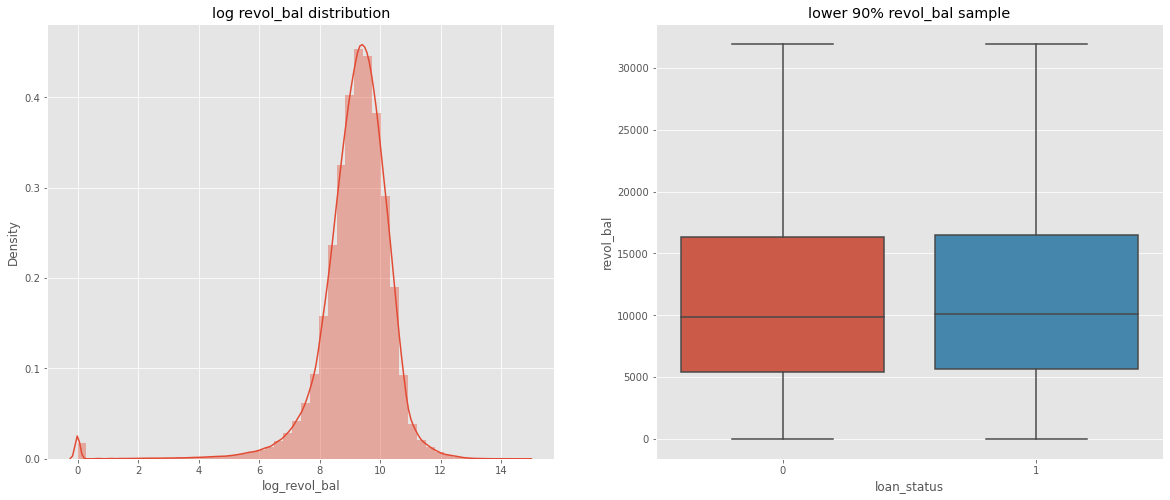

In [77]:
num_col_eda('revol_bal', 0.90)

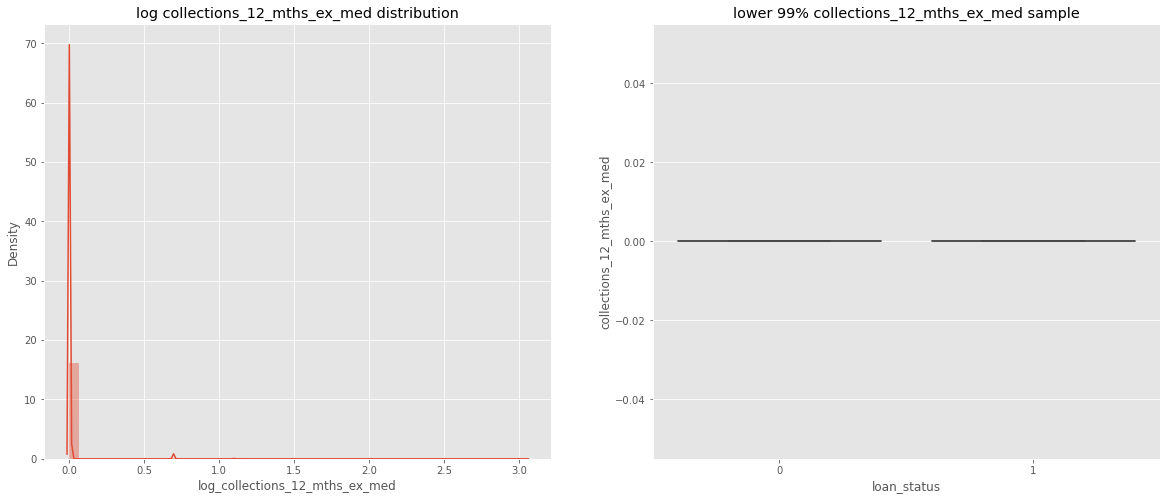

In [78]:
# collections_12_mths_ex_med has very sparse distribution and is concentrated around 0
# considering coding it and converting to categorical feaure
num_col_eda('collections_12_mths_ex_med', 0.99)

In [79]:
df['collections_12_mths_ex_med'].value_counts(normalize = True)[:5]

0.0    0.986679
1.0    0.012371
2.0    0.000808
3.0    0.000086
4.0    0.000031
5.0    0.000009
Name: collections_12_mths_ex_med, dtype: float64

In [80]:
df['collections_12_mths_ex_med_coded'] = df['collections_12_mths_ex_med'].map(lambda x: str(x) if x <= 1 else '2+')
df.groupby('collections_12_mths_ex_med_coded')['loan_status'].value_counts(normalize = True)

collections_12_mths_ex_med_coded  loan_status
0.0                               0              0.798152
                                  1              0.201848
1.0                               0              0.733002
                                  1              0.266998
2+                                0              0.727081
                                  1              0.272919
Name: loan_status, dtype: float64

In [81]:
print(df.columns)

Index(['loan_amnt', 'purpose', 'term', 'int_rate', 'grade', 'sub_grade',
       'home_ownership', 'emp_length', 'annual_inc', 'dti', 'addr_state',
       'cr_history_length', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'loan_status',
       'collections_12_mths_ex_med', 'verification_status', 'fico',
       'log_loan_amnt', 'log_int_rate', 'log_annual_inc', 'log_dti',
       'log_cr_history_length', 'log_inq_last_6mths', 'log_open_acc',
       'log_pub_rec', 'log_revol_bal', 'log_revol_util', 'log_total_acc',
       'log_collections_12_mths_ex_med', 'log_fico', 'inq_last_6mths_coded',
       'pub_rec_coded', 'collections_12_mths_ex_med_coded'],
      dtype='object')


In [82]:
# look at the label distribution across different categories
# first drop sub_grade as it is highly correlated with grade

df.drop(['sub_grade'], axis = 1, inplace = True)
cat_cols = df.columns[df.dtypes == 'object']
print(cat_cols)

Index(['purpose', 'term', 'grade', 'home_ownership', 'emp_length',
       'addr_state', 'verification_status', 'inq_last_6mths_coded',
       'pub_rec_coded', 'collections_12_mths_ex_med_coded'],
      dtype='object')


In [83]:
# As addr_state contains too many levels, we will evaluate this categorical feature separately
df['addr_state'].nunique()

51

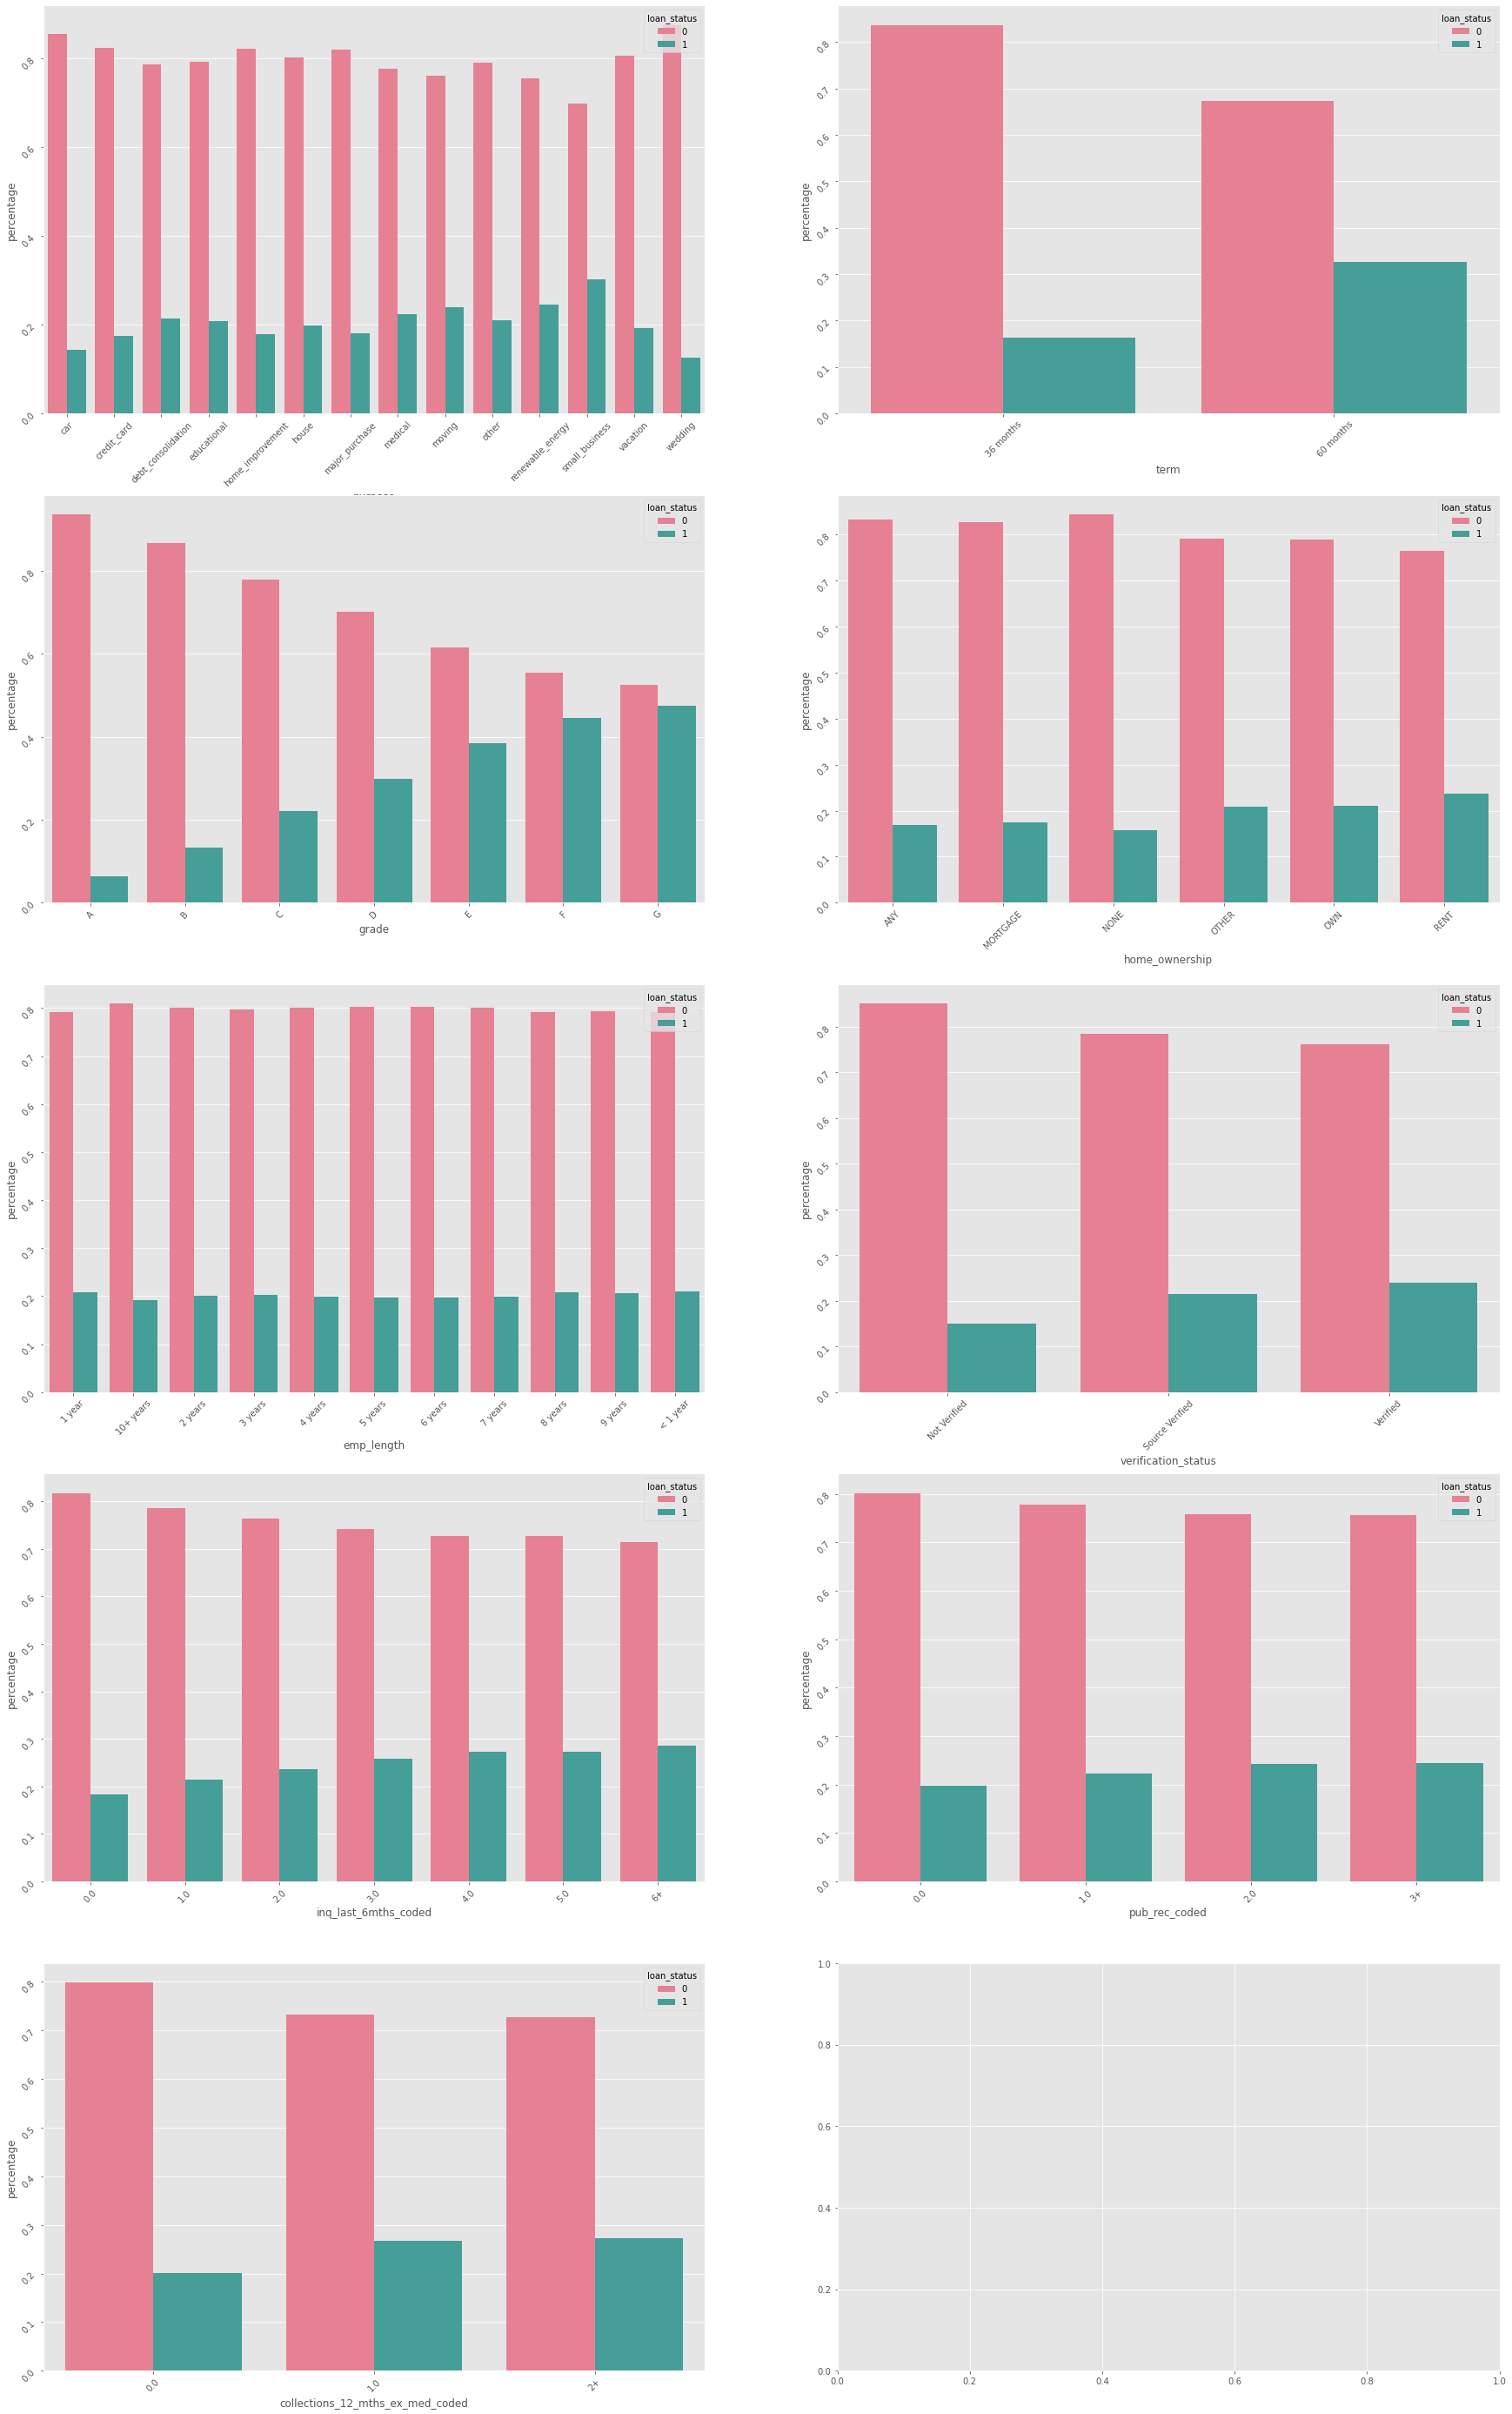

In [84]:
fig, axes = plt.subplots(5, 2, figsize = [30, 50])
for i, col in enumerate(cat_cols.drop('addr_state')):
    tbl = df.groupby([col])['loan_status'].value_counts(normalize = True).rename('percentage').reset_index()
    ax = sns.barplot(x = col, y = 'percentage', hue = 'loan_status', data = tbl, 
                palette = 'husl', ax = axes[i//2][i%2])
    ax.tick_params(labelrotation = 45)
plt.show()

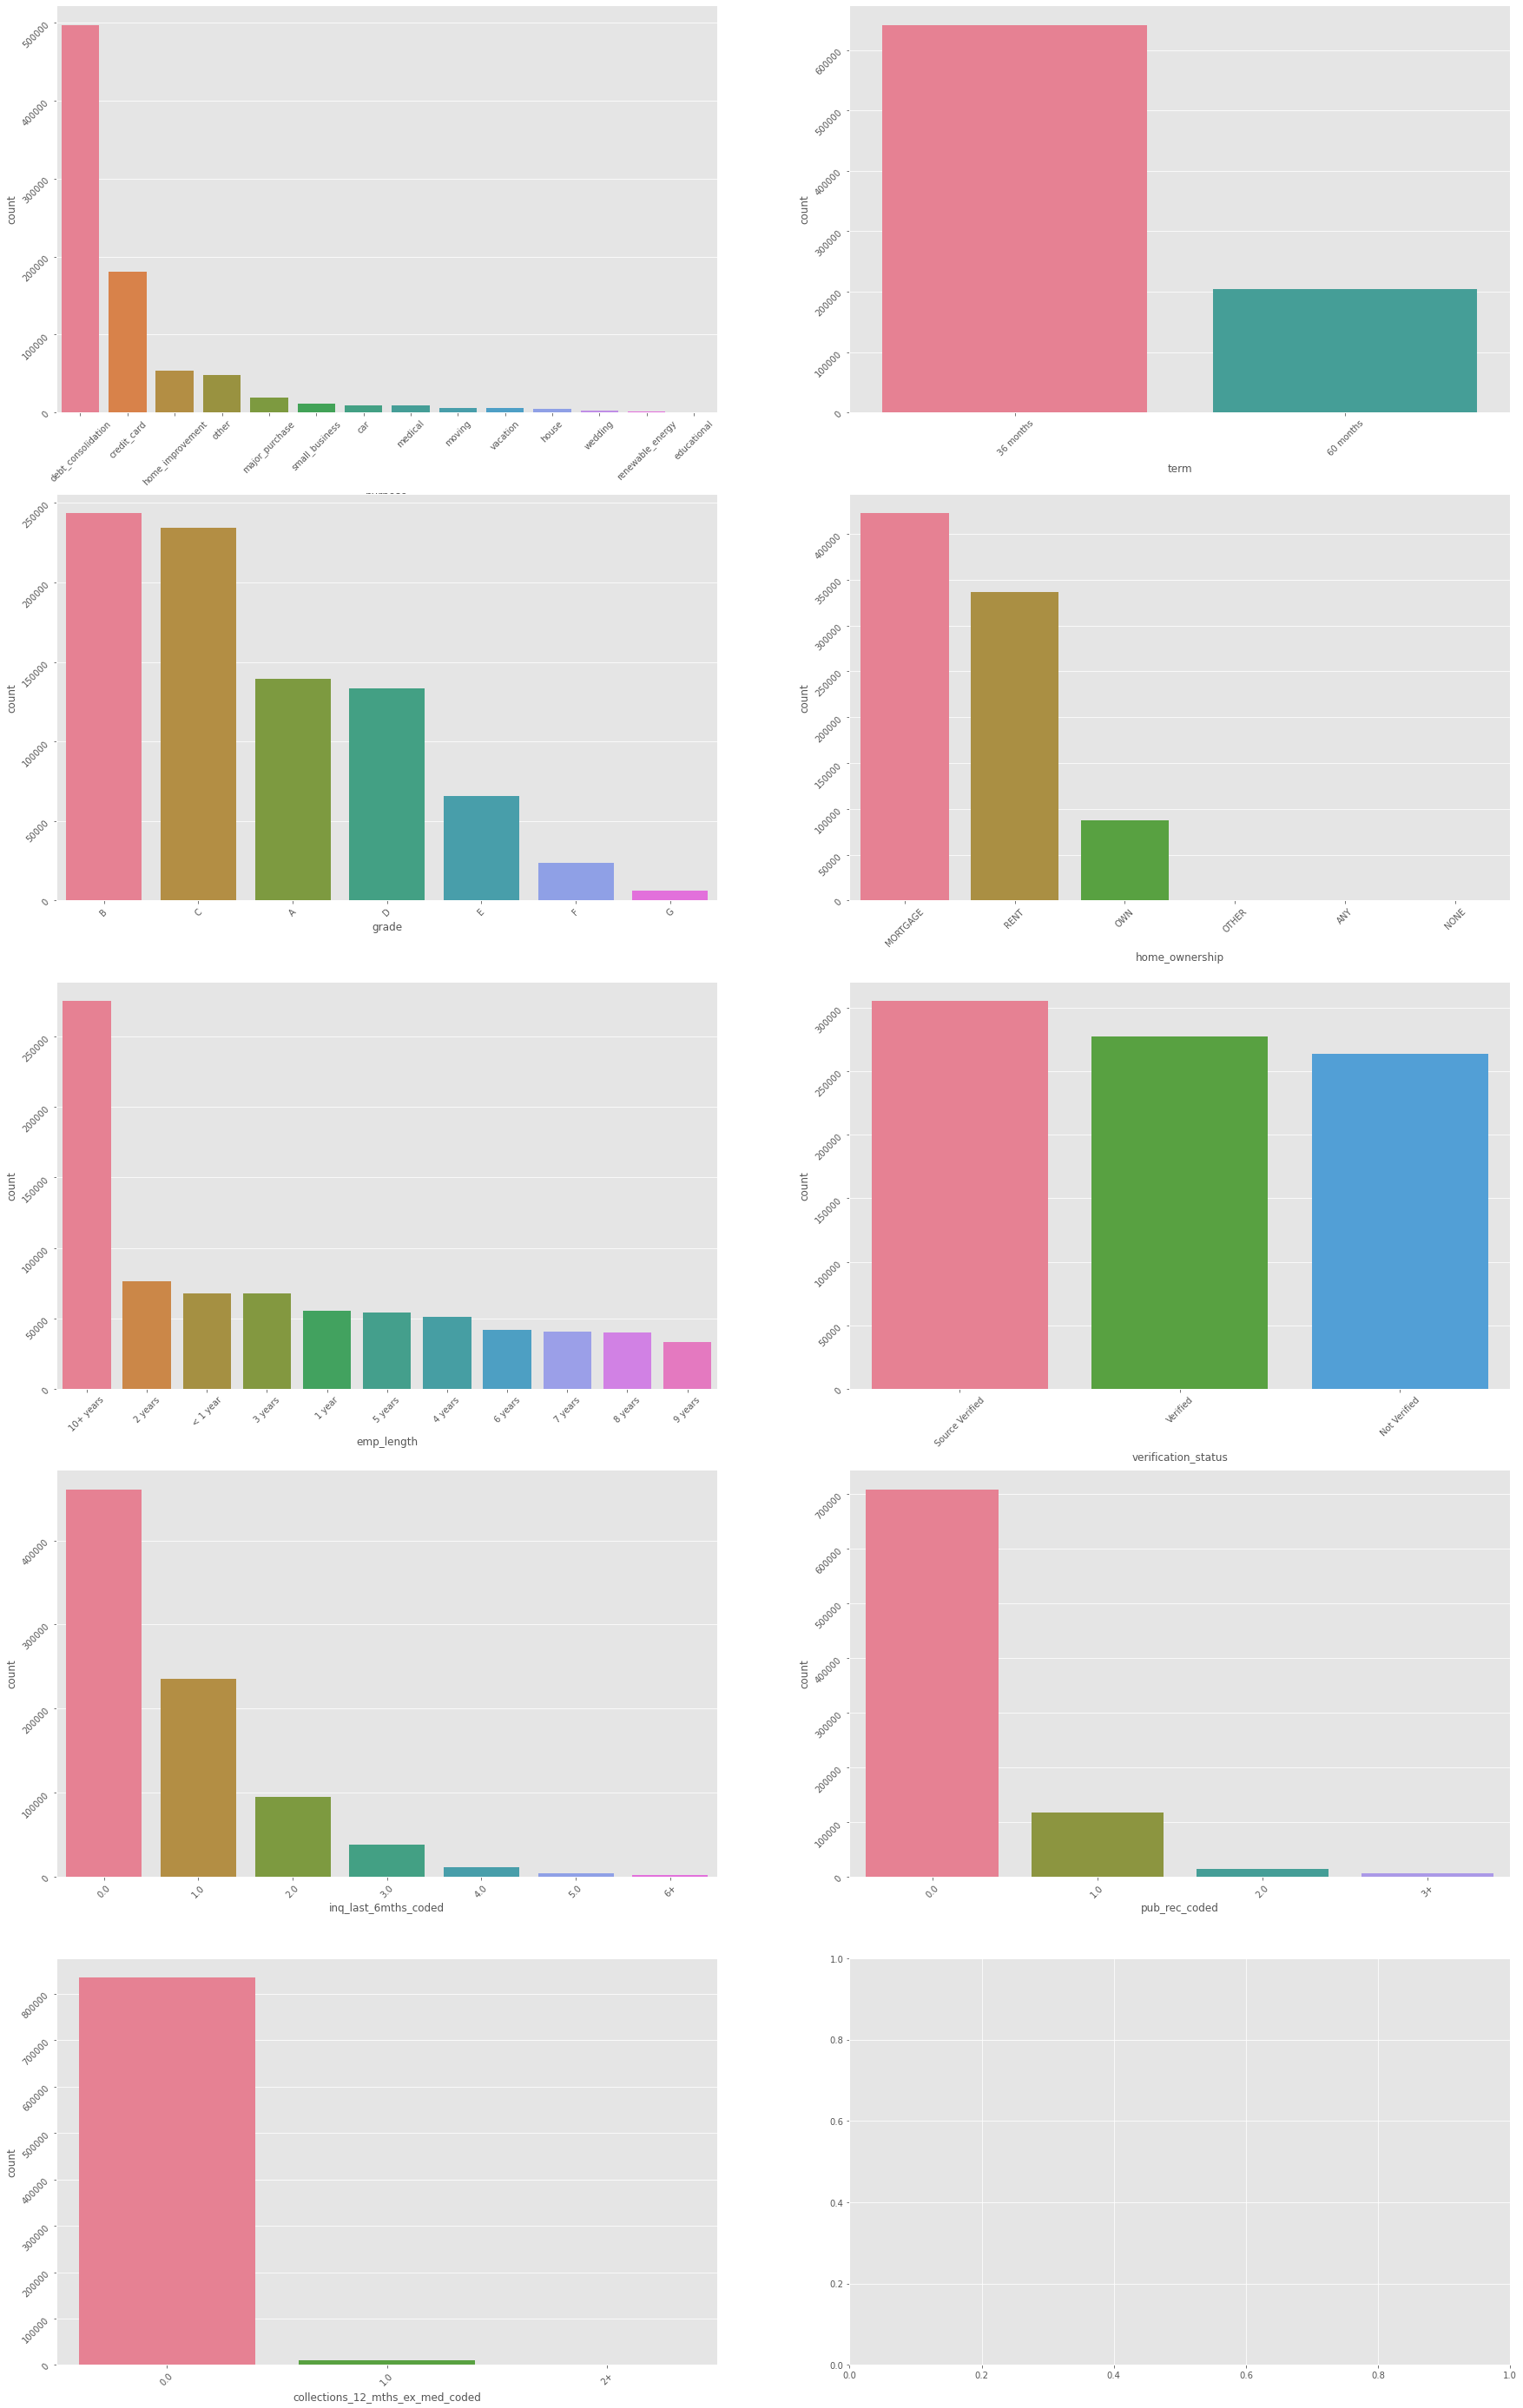

In [85]:
# look at the distribution of each categorical feature

fig, axes = plt.subplots(5, 2, figsize = [30, 50])
for i, col in enumerate(cat_cols.drop('addr_state')):
    ax = sns.countplot(df[col], palette = 'husl', 
                       order = df[col].value_counts().index, ax = axes[i//2][i%2])
    ax.tick_params(labelrotation = 45)
plt.show()

In [86]:
# look at loan information by address state
# looks like default loans are pretty evenly distributed across states

avg_by_addr = df.groupby(['addr_state'])[['loan_amnt','loan_status']].mean().reset_index()
sum_by_addr = df.groupby(['addr_state'])[['loan_amnt']].sum().reset_index()
loan_by_addr = avg_by_addr.merge(sum_by_addr, on = ['addr_state']).rename(columns = {'loan_amnt_x':'avg loan amnt',
                                                                                    'loan_status':'avg default rate',
                                                                                    'loan_amnt_y':'total loan amnt'})
loan_by_addr.sort_values(by = ['avg default rate','avg loan amnt'], ascending = False, inplace = True)
loan_by_addr.head(10)

,addr_state,avg loan amnt,avg default rate,total loan amnt
25,MS,14058.489324,0.269377,48065975.0
29,NE,13546.714379,0.253741,20821300.0
36,OK,14073.796774,0.244215,106440125.0
1,AL,13862.866780,0.243702,146932525.0
2,AR,13367.156000,0.239680,83544725.0
18,LA,14205.708122,0.234924,139926225.0
33,NV,13566.836218,0.229888,174035375.0
42,TN,14066.694769,0.224708,171022875.0
15,IN,14015.334285,0.223964,181540625.0
34,NY,14188.224330,0.223532,978178750.0


In [87]:
'''
# install plotply
# pip install plotly==5.5.0
# map illustration of total loan amount by states

import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=loan_by_addr['addr_state'], 
    z = loan_by_addr['total loan amnt'], 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = "US $",
))

fig.update_layout(
    title_text = 'Total loan amount issued by states',
    geo_scope='usa', 
)

fig.show()
'''

'\n# install plotply\n# pip install plotly==5.5.0\n# map illustration of total loan amount by states\n\nimport plotly.graph_objects as go\n\nfig = go.Figure(data=go.Choropleth(\n    locations=loan_by_addr[\'addr_state\'], \n    z = loan_by_addr[\'total loan amnt\'], \n    locationmode = \'USA-states\', \n    colorscale = \'Reds\',\n    colorbar_title = "US $",\n))\n\nfig.update_layout(\n    title_text = \'Total loan amount issued by states\',\n    geo_scope=\'usa\', \n)\n\nfig.show()\n'

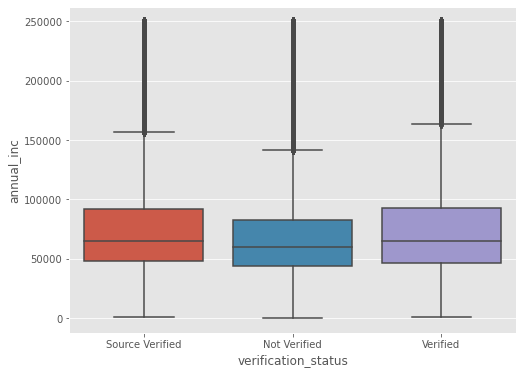

In [88]:
# have a understanding of annual inc distribution and the verification status
# the distribution of majority of the income popuplation behavior pretty consistently across different verification
# status. Looks like lending club tends to verify those with high incomes and ignore those with low incomes, or maybe
# it is more difficult to verify those with low incomes 

matplotlib.rcParams['figure.figsize'] = 8, 6
sns.boxplot(data = df[df['annual_inc'] <= df['annual_inc'].quantile(0.99)], 
            x = 'verification_status', y = 'annual_inc')
plt.show()

In [89]:
# people with extremely high incomes will have a high verification ratio compared to the entire population
# Looks like verifcation status and annual income have some sort of interdependency, but we will keep both
# features for now
df[df['annual_inc'] > df['annual_inc'].quantile(0.99)]['verification_status'].value_counts(normalize = True)

Source Verified    0.507677
Verified           0.409800
Not Verified       0.082523
Name: verification_status, dtype: float64

In [90]:
df['verification_status'].value_counts(normalize = True)

Source Verified    0.360569
Verified           0.327814
Not Verified       0.311617
Name: verification_status, dtype: float64

# 2.1 Data cleaning and pre-processing

In [91]:
# Treating missing values

cols_with_na = df.isnull().sum()[df.isnull().sum() > 0]
cols_with_na

emp_length                        44430
annual_inc                        4    
inq_last_6mths                    30   
open_acc                          29   
pub_rec                           29   
revol_util                        579  
total_acc                         29   
collections_12_mths_ex_med        145  
log_annual_inc                    4    
log_inq_last_6mths                30   
log_open_acc                      29   
log_pub_rec                       29   
log_revol_util                    579  
log_total_acc                     29   
log_collections_12_mths_ex_med    145  
dtype: int64

In [92]:
# Except for emp_length, other features only contain a few missing values, so consider dropping those examples

df.dropna(subset = cols_with_na.index.drop('emp_length'), inplace = True)

In [93]:
df.isnull().sum()[df.isnull().sum() > 0]

emp_length    44401
dtype: int64

In [94]:
# for home_ownership, we can group OTHER, ANY, NONE as one level

df['home_ownership'].replace(['ANY','NONE'], 'OTHER', inplace = True)
df['home_ownership'].value_counts(normalize = True)

MORTGAGE    0.499418
RENT        0.397414
OWN         0.102790
OTHER       0.000378
Name: home_ownership, dtype: float64

In [95]:
# for empl_length, we need to fill the missing values, consider using median, for some categorical features
# with unnecessarily many levels, consider bucketing or group lower 5% levels into one group based on frequency

df['emp_length'].value_counts()

10+ years    275008
2 years      76324 
< 1 year     67592 
3 years      67485 
1 year       55560 
5 years      54085 
4 years      50692 
6 years      41617 
7 years      40586 
8 years      39791 
9 years      32824 
Name: emp_length, dtype: int64

In [96]:
df['purpose'].value_counts()

debt_consolidation    496980
credit_card           180738
home_improvement      53316 
other                 47359 
major_purchase        18532 
small_business        10677 
car                   9434  
medical               9423  
moving                6033  
vacation              5408  
house                 4706  
wedding               2326  
renewable_energy      623   
educational           410   
Name: purpose, dtype: int64

In [97]:
df['addr_state'].value_counts()[:10]

CA    128772
NY    68880 
TX    68046 
FL    59559 
IL    31981 
NJ    30590 
PA    28806 
OH    27182 
GA    26966 
VA    24570 
Name: addr_state, dtype: int64

In [98]:
df['inq_last_6mths_coded'].value_counts()

0.0    460361
1.0    235472
2.0    94905 
3.0    38368 
4.0    11083 
5.0    4150  
6+     1626  
Name: inq_last_6mths_coded, dtype: int64

In [99]:
df['pub_rec_coded'].value_counts()

0.0    707713
1.0    116974
2.0    14304 
3+     6974  
Name: pub_rec_coded, dtype: int64

In [100]:
df['collections_12_mths_ex_med_coded'].value_counts()

0.0    834692
1.0    10469 
2+     804   
Name: collections_12_mths_ex_med_coded, dtype: int64

In [101]:
df['inq_last_6mths_coded'] = df['inq_last_6mths'].map(lambda x: str(x) if x <= 3 else '4+')
df['inq_last_6mths_coded'].value_counts()

0.0    460361
1.0    235472
2.0    94905 
3.0    38368 
4+     16859 
Name: inq_last_6mths_coded, dtype: int64

In [102]:
def emp_length_mapper(x):
    if x == '< 1 year':
        return '0'
    elif x == '10+ years':
        return '10+'
    elif x[0] in ['1', '2', '3']:
        return '1-3'
    elif x[0] in ['4', '5', '6']:
        return '4-6'
    else:
        return '7-9'
df['emp_length_coded'] = df['emp_length'].map(emp_length_mapper, na_action = 'ignore')
df['emp_length_coded'].value_counts(dropna = False)

10+    275008
1-3    199369
4-6    146394
7-9    113201
0      67592 
NaN    44401 
Name: emp_length_coded, dtype: int64

# 2.2 Data split and feature engineering

In [103]:
df.columns

Index(['loan_amnt', 'purpose', 'term', 'int_rate', 'grade', 'home_ownership',
       'emp_length', 'annual_inc', 'dti', 'addr_state', 'cr_history_length',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'loan_status', 'collections_12_mths_ex_med',
       'verification_status', 'fico', 'log_loan_amnt', 'log_int_rate',
       'log_annual_inc', 'log_dti', 'log_cr_history_length',
       'log_inq_last_6mths', 'log_open_acc', 'log_pub_rec', 'log_revol_bal',
       'log_revol_util', 'log_total_acc', 'log_collections_12_mths_ex_med',
       'log_fico', 'inq_last_6mths_coded', 'pub_rec_coded',
       'collections_12_mths_ex_med_coded', 'emp_length_coded'],
      dtype='object')

In [104]:
y = df['loan_status']
X = df.drop(['loan_status'], axis = 1)

In [105]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(random_state = 123, test_size = 0.25)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [106]:
# treat remaining missing values
X_train.isnull().sum()[X_train.isnull().sum() > 0]

emp_length          33377
emp_length_coded    33377
dtype: int64

In [107]:
# we are not sure why the values are missing. For now, we replace the missing values with median
# first encode the emp length as numerical values and calculate the median 
# the median is 6 years of employment length. 
def emp_length_to_int(x):
    if x == '10+ years':
        return 10
    elif x == '< 1 year':
        return 0
    else:
        return int(x[0])
fill_value_emp_length = X_train['emp_length'].map(emp_length_to_int, na_action= 'ignore').median()
print(fill_value_emp_length)

6.0


In [108]:
# so fill emp_length_coded with '4-6'
X_train['emp_length_coded'].fillna('4-6', inplace = True)
X_test['emp_length_coded'].fillna('4-6', inplace = True)

In [109]:
X_train['emp_length_coded'].value_counts(dropna = False)

10+    206153
1-3    149493
4-6    143240
7-9    84775 
0      50812 
Name: emp_length_coded, dtype: int64

In [110]:
X_test['emp_length_coded'].value_counts(dropna = False)

10+    68855
1-3    49876
4-6    47555
7-9    28426
0      16780
Name: emp_length_coded, dtype: int64

In [111]:
# define a function to re-group categorical features that have too many levels
# set a threshold to group the tail into one level based on train data and do a replacement for test data

def cat_feature_bucketing(col, new_level_name, threshold):
    cum_freq = X_train[col].value_counts(normalize = True).cumsum()
    features_to_group = cum_freq[cum_freq > threshold].index
    X_train[col + '_coded'] = X_train[col].replace(features_to_group, new_level_name)
    X_test[col + '_coded'] = X_test[col].replace(features_to_group, new_level_name)

In [112]:
X_train['purpose'].value_counts(normalize = True).cumsum()

debt_consolidation    0.587754
credit_card           0.801826
home_improvement      0.864543
other                 0.920425
major_purchase        0.942209
small_business        0.954835
car                   0.966017
medical               0.977127
moving                0.984133
vacation              0.990498
house                 0.996047
wedding               0.998777
renewable_energy      0.999519
educational           1.000000
Name: purpose, dtype: float64

In [113]:
X_train['addr_state'].value_counts(normalize = True).cumsum()[-20:-1]

UT    0.943228
AR    0.950553
NM    0.956194
HI    0.961469
NH    0.966088
RI    0.970412
MS    0.974442
WV    0.978436
MT    0.981348
DC    0.984166
DE    0.986947
AK    0.989483
WY    0.991688
SD    0.993812
VT    0.995713
NE    0.997562
ME    0.998454
ND    0.999229
ID    0.999983
Name: addr_state, dtype: float64

In [114]:
cat_feature_bucketing('purpose', 'other', 0.99)
cat_feature_bucketing('addr_state', 'other_state', 0.95)

In [115]:
X_train['purpose_coded'].value_counts(normalize = True)

debt_consolidation    0.587754
credit_card           0.214072
other                 0.071749
home_improvement      0.062717
major_purchase        0.021783
small_business        0.012626
car                   0.011183
medical               0.011110
moving                0.007006
Name: purpose_coded, dtype: float64

In [116]:
X_test['purpose_coded'].value_counts(normalize = True)

debt_consolidation    0.586623
credit_card           0.212372
other                 0.072386
home_improvement      0.063946
major_purchase        0.022275
small_business        0.012606
medical               0.011225
car                   0.011060
moving                0.007509
Name: purpose_coded, dtype: float64

In [117]:
X_train['addr_state_coded'].value_counts(normalize = True)[:10]

CA             0.152156
NY             0.081457
TX             0.080369
FL             0.070438
other_state    0.056772
IL             0.037685
NJ             0.036184
PA             0.034186
OH             0.032254
GA             0.031811
Name: addr_state_coded, dtype: float64

In [118]:
X_test['addr_state_coded'].value_counts(normalize = True)[:10]

CA             0.152408
NY             0.081317
TX             0.080637
FL             0.070301
other_state    0.056267
IL             0.038162
NJ             0.036086
PA             0.033647
GA             0.032072
OH             0.031765
Name: addr_state_coded, dtype: float64

In [119]:
X_train.columns

Index(['loan_amnt', 'purpose', 'term', 'int_rate', 'grade', 'home_ownership',
       'emp_length', 'annual_inc', 'dti', 'addr_state', 'cr_history_length',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med', 'verification_status',
       'fico', 'log_loan_amnt', 'log_int_rate', 'log_annual_inc', 'log_dti',
       'log_cr_history_length', 'log_inq_last_6mths', 'log_open_acc',
       'log_pub_rec', 'log_revol_bal', 'log_revol_util', 'log_total_acc',
       'log_collections_12_mths_ex_med', 'log_fico', 'inq_last_6mths_coded',
       'pub_rec_coded', 'collections_12_mths_ex_med_coded', 'emp_length_coded',
       'purpose_coded', 'addr_state_coded'],
      dtype='object')

In [120]:
# One-hot encoding of categorical features

cat_cols = ['purpose_coded', 'term', 'grade', 'home_ownership', 'emp_length_coded',
            'addr_state_coded', 'verification_status', 'inq_last_6mths_coded', 'pub_rec_coded',
            'collections_12_mths_ex_med_coded']

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(X_train[cat_cols])

transformed_train = pd.DataFrame(enc.transform(X_train[cat_cols]).toarray(), columns = enc.get_feature_names(cat_cols))
X_train = pd.concat([X_train.reset_index(drop = True), transformed_train], axis = 1).drop(cat_cols, axis = 1)

transformed_test = pd.DataFrame(enc.transform(X_test[cat_cols]).toarray(), columns = enc.get_feature_names(cat_cols))
X_test = pd.concat([X_test.reset_index(drop = True), transformed_test], axis = 1).drop(cat_cols, axis = 1)


In [121]:
X_train.head()

,loan_amnt,purpose,int_rate,emp_length,annual_inc,dti,addr_state,cr_history_length,inq_last_6mths,open_acc,...,inq_last_6mths_coded_2.0,inq_last_6mths_coded_3.0,inq_last_6mths_coded_4+,pub_rec_coded_0.0,pub_rec_coded_1.0,pub_rec_coded_2.0,pub_rec_coded_3+,collections_12_mths_ex_med_coded_0.0,collections_12_mths_ex_med_coded_1.0,collections_12_mths_ex_med_coded_2+
0,23325.0,house,6.62,5 years,90000.0,6.75,MA,71,0.0,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18000.0,home_improvement,14.64,2 years,40000.0,7.17,RI,142,0.0,10.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4800.0,credit_card,7.26,10+ years,160000.0,11.86,OH,221,0.0,15.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5500.0,credit_card,8.90,2 years,59778.0,3.53,VA,221,1.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,8800.0,credit_card,11.67,< 1 year,25000.0,20.79,AR,126,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [122]:
X_test.head()

,loan_amnt,purpose,int_rate,emp_length,annual_inc,dti,addr_state,cr_history_length,inq_last_6mths,open_acc,...,inq_last_6mths_coded_2.0,inq_last_6mths_coded_3.0,inq_last_6mths_coded_4+,pub_rec_coded_0.0,pub_rec_coded_1.0,pub_rec_coded_2.0,pub_rec_coded_3+,collections_12_mths_ex_med_coded_0.0,collections_12_mths_ex_med_coded_1.0,collections_12_mths_ex_med_coded_2+
0,7000.0,debt_consolidation,8.24,< 1 year,75000.0,9.20,FL,77,0.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,35000.0,other,25.69,7 years,92514.0,21.73,CA,263,0.0,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5000.0,other,11.49,10+ years,80000.0,11.96,OH,204,0.0,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,20000.0,home_improvement,10.64,6 years,70000.0,7.34,IL,310,0.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18725.0,debt_consolidation,16.02,10+ years,65000.0,19.44,PA,94,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [123]:
# also reset index of y_test and y_train 
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [124]:
"""
# perform mean encoding for addr_state using 20-fold cv embedded with 10-fold cv to regularize for overfitting
from sklearn.model_selection import StratifiedKFold

col = 'addr_state'

# create a new column to store the mean-encoded values for addr_state
X_train[col + '_target_mean'] = 0
X_test[col + '_target_mean'] = 0

level_index = X_train[col + '_new'].unique()

skf1 = StratifiedKFold(n_splits = 20, shuffle = True, random_state = 123)
skf2 = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 123)
for tr_idx1, val_idx1 in skf1.split(X_train, y_train):
    X_tr1, X_val1 = X_train.iloc[tr_idx1], X_train.iloc[val_idx1]
    y_tr1, y_val1 = y_train.iloc[tr_idx1], y_train.iloc[val_idx1]
    means = pd.Series(0, index = level_index)
    for tr_idx2, val_idx2 in skf2.split(X_tr1, y_tr1):
        X_tr2, X_val2 = X_tr1.iloc[tr_idx2], X_tr1.iloc[val_idx2]
        y_tr2, y_val2 = y_tr1.iloc[tr_idx2], y_tr1.iloc[val_idx2]
        X_y_tr2 = pd.concat([X_tr2, y_tr2], axis = 1)
        means += X_y_tr2.groupby(col + '_coded')['loan_status'].mean().reindex(level_index, fill_value = 0)
    X_train[col + '_target_mean'].iloc[val_idx1] = X_val1[col + '_coded'].map(means)/10

# mean encoding test data using global mean from train data
X = pd.concat([X_train, y_train], axis = 1)
X_test[col + '_target_mean'] = X_test[col + '_coded'].map(X.groupby(col + '_coded')['loan_status'].mean())
"""
import numpy as np

In [125]:
# now we need to drop the following raw features: 
redundant_features = \
['purpose', 'emp_length', 'addr_state', 'annual_inc', 'dti', 'log_inq_last_6mths', 'inq_last_6mths',
'log_pub_rec', 'pub_rec', 'collections_12_mths_ex_med', 'log_collections_12_mths_ex_med', 'log_cr_history_length',
'log_open_acc', 'log_fico', 'log_total_acc', 'revol_bal', 'revol_util', 'log_int_rate', 'log_loan_amnt']

X_train.drop(redundant_features, axis = 1, inplace = True)
X_test.drop(redundant_features, axis = 1, inplace = True)


In [126]:
# after one-hot encoding, we want to select the binary features based on the chi-squared test against the target variable,
# we select the top 35 features based on the p-value

from sklearn.feature_selection import SelectKBest, chi2, f_classif

def binary_feature_selector(X, y, n_features):
    selector = SelectKBest(chi2, k = n_features)
    selector.fit(X, y)
    mask = selector.get_support()
    return (X.columns[mask], selector.scores_[mask], selector.pvalues_[mask])


In [127]:
num_cols = ['loan_amnt', 'int_rate', 'cr_history_length', 'open_acc', 'total_acc',
       'fico', 'log_annual_inc', 'log_dti', 'log_revol_bal', 'log_revol_util']

features, chi2_stat, p_values = binary_feature_selector(X_train.drop(num_cols, axis = 1), y_train, 35)
chi2_tbl = pd.DataFrame({'binary feature name':features, 'Chi2 Stat':chi2_stat, 
                        'p value': p_values}).sort_values(by = 'Chi2 Stat', ascending = False)
chi2_tbl

,binary feature name,Chi2 Stat,p value
6,term_ 60 months,14581.544209,0.000000e+00
7,grade_A,12476.462230,0.000000e+00
11,grade_E,10197.857028,0.000000e+00
12,grade_F,6392.363068,0.000000e+00
10,grade_D,5634.370798,0.000000e+00
8,grade_B,5489.787220,0.000000e+00
5,term_ 36 months,4658.223246,0.000000e+00
23,verification_status_Not Verified,3465.677424,0.000000e+00
13,grade_G,2226.080107,0.000000e+00
25,verification_status_Verified,1693.673022,0.000000e+00


In [128]:
# we keep all the continuous features, but let's check their association with target variable based on
# F-test (one-way anova). Looks like the numerical features all have strong association with target variable
anova_scores = f_classif(X_train[num_cols], y_train)
anova_tbl = pd.DataFrame({'numerical feature name': num_cols, 'F-stat': anova_scores[0],
                         'p value': anova_scores[1]}).sort_values(by = 'F-stat', ascending = False)
anova_tbl

,numerical feature name,F-stat,p value
1,int_rate,40354.790970,0.000000e+00
5,fico,12565.776651,0.000000e+00
7,log_dti,7842.237966,0.000000e+00
6,log_annual_inc,3553.013273,0.000000e+00
9,log_revol_util,3024.538222,0.000000e+00
0,loan_amnt,2534.721604,0.000000e+00
3,open_acc,664.935841,1.502283e-146
2,cr_history_length,519.087146,7.437170e-115
4,total_acc,88.170240,6.024510e-21
8,log_revol_bal,7.398594,6.527666e-03


In [129]:
final_features = chi2_tbl.iloc[:,0].append(anova_tbl.iloc[:,0])
X_train = X_train[final_features]
X_test = X_test[final_features]

In [130]:
X_train.head()

,term_ 60 months,grade_A,grade_E,grade_F,grade_D,grade_B,term_ 36 months,verification_status_Not Verified,grade_G,verification_status_Verified,...,int_rate,fico,log_dti,log_annual_inc,log_revol_util,loan_amnt,open_acc,cr_history_length,total_acc,log_revol_bal
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,6.62,767.0,2.047693,11.407576,2.785011,23325.0,8.0,71,11.0,7.965893
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,14.64,702.0,2.100469,10.596660,3.261935,18000.0,10.0,142,11.0,8.624252
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,7.26,742.0,2.554122,11.982935,2.079442,4800.0,15.0,221,48.0,7.524561
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,8.90,682.0,1.510722,10.998410,3.310543,5500.0,7.0,221,11.0,8.170186
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,11.67,757.0,3.081451,10.126671,3.627004,8800.0,6.0,126,10.0,8.019942


In [131]:
X_test.head()

,term_ 60 months,grade_A,grade_E,grade_F,grade_D,grade_B,term_ 36 months,verification_status_Not Verified,grade_G,verification_status_Verified,...,int_rate,fico,log_dti,log_annual_inc,log_revol_util,loan_amnt,open_acc,cr_history_length,total_acc,log_revol_bal
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,8.24,727.0,2.322388,11.225257,3.891820,7000.0,7.0,77,8.0,8.976641
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,25.69,687.0,3.123686,11.435126,1.410987,35000.0,8.0,263,17.0,6.291569
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,11.49,712.0,2.561868,11.289794,4.261270,5000.0,8.0,204,15.0,8.862484
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,10.64,702.0,2.121063,11.156265,4.238445,20000.0,7.0,310,18.0,9.585415
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,16.02,717.0,3.017494,11.082158,4.001864,18725.0,5.0,94,17.0,8.588211


In [132]:
# perform standardization for numerical features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 3.0 Model Training

### 3.1 Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, precision_recall_curve, average_precision_score,\
classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, f1_score, PrecisionRecallDisplay


In [177]:
from sklearn.model_selection import StratifiedKFold
# define a function to train model during cv and generate average score
def cross_val_score(X, y, cv, classifier, metric, **kwargs):
    skf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = 123)
    scores = []
    for tr_idx, val_idx in skf.split(X, y):
        X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
        clf = classifier(**kwargs)
        clf.fit(X_tr, y_tr)
        y_pred = clf.predict(X_val)
        y_pred_proba = clf.predict_proba(X_val)[:,1]
        if metric == 'accuracy':
            scores.append(accuracy_score(y_val, y_pred))
        if metric == 'roc_auc':
            scores.append(roc_auc_score(y_val, y_pred_proba))
    return np.mean(scores)  

In [178]:
logit_accuracy0 = cross_val_score(X_train, y_train, 5, LogisticRegression, 'accuracy')
logit_auc0 = cross_val_score(X_train, y_train, 5, LogisticRegression, 'roc_auc')
print('train accuracy of logistic regression at round 0: ' + str(round(logit_accuracy0, 3)))
print('train auc of logistic regression at round 0: ' + str(round(logit_auc0, 3)))

train accuracy of logistic regression at round 0: 0.8
train auc of logistic regression at round 0: 0.712


In [179]:
from sklearn.model_selection import GridSearchCV
# define a function to tune hyperparameter and generate the best estimator, scores on train & test data

def SearchFit(X_tr, y_tr, X_te, y_te, cv, classifier, metric, param_grid):
    gridsearch = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                              scoring = metric, cv = cv)
    gridsearch.fit(X_tr, y_tr)
    
    best_clf = gridsearch.best_estimator_
    tr_score = gridsearch.best_score_
    best_params = gridsearch.best_params_
    
    y_te_pred = best_clf.predict(X_te)
    y_te_pred_proba = best_clf.predict_proba(X_te)
    if metric == 'accuracy':
        te_score = accuracy_score(y_te, y_te_pred)
    if metric == 'roc_auc':
        te_score = roc_auc_score(y_te, y_te_pred_proba[:,1])
    
    return (best_clf, best_params, tr_score, te_score, y_te_pred, y_te_pred_proba)

In [180]:
param_grid = {'penalty': ['l1','l2'], 
              'C': [0.01, 0.05, 0.1, 0.2, 0.5, 1, 1.5, 2, 5, 10, 20, 50, 100]}

%time best_clf, best_params, tr_score, te_score, y_pred, y_pred_proba = \
SearchFit(X_train, y_train, X_test, y_test, 5, LogisticRegression(), 'roc_auc', param_grid)

CPU times: user 18min 29s, sys: 35.9 s, total: 19min 5s
Wall time: 5min 12s


In [192]:
print('validation auc of logistic regression at round 1: ' + str(round(tr_score, 3)))
print('test auc of logistic regression at round 1: ' + str(round(te_score, 3)))

validation auc of logistic regression at round 1: 0.712
test auc of logistic regression at round 1: 0.713


In [193]:
roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])

0.7119197907183299

In [141]:
# draw roc curve for test data
def plot_roc(y_true, y_score, name):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label = name)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve: ' + name)
    plt.legend(loc='best')
    plt.show()

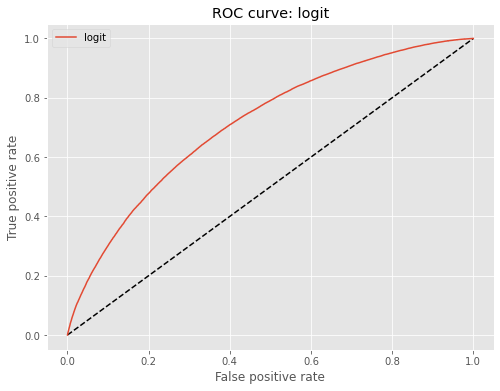

In [142]:
plot_roc(y_test, y_pred_proba[:,1], 'logit')

In [160]:
# create a function to show the model ability to rank order test data as well as generate the Kolmogorov–Smirnov stat

def show_rankorder(y_true, y_score, name, show_tbl = False):
    df = pd.DataFrame({'Target': y_true, 'Proba': y_score})
    df['Decile'] = pd.qcut(df['Proba'], 10, labels = range(10, 0, -1))
    total = df.groupby('Decile')['Target'].count().rename('total #').reset_index()
    positive = df.groupby('Decile')['Target'].sum().rename('positive #').reset_index()
    decile_tbl = total.merge(positive, on = 'Decile').sort_values(by = 'Decile', 
                                                                  ascending = False).reset_index(drop = True)
    decile_tbl['negative #'] = decile_tbl['total #'] - decile_tbl['positive #']
    decile_tbl['positive %'] = decile_tbl['positive #']/decile_tbl['positive #'].sum()
    decile_tbl['negative %'] = decile_tbl['negative #']/decile_tbl['negative #'].sum()
    decile_tbl['KS by decile'] = round(decile_tbl['positive %'].cumsum() - decile_tbl['negative %'].cumsum(), 3)
    KS  = decile_tbl['KS by decile'].max()
    sns.barplot(x = 'Decile', y = 'positive %', 
                data = decile_tbl, color = 'salmon').set(title = 'Rank Order: ' + name + ', KS = ' + str(round(KS, 3)))
    plt.show()
    if show_tbl:
        return decile_tbl
    

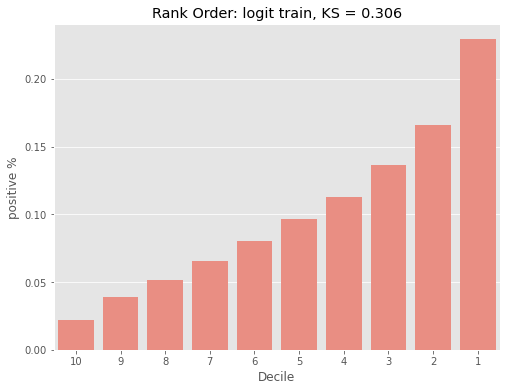

In [144]:
"""
1. the rank order on train/test data is obvious and no break point occurs. 
2. KS is acceptable meaning that the model has capability of separating positive and negative examples, but the 
prediction power is not high. Looks like the model is underfitting, need to use more complex algorithm 
3. If the business need is to use rank order of predicted probabilities to make the funding decision, then rank ordering
and AUC score may be good enough. However, if business need is to make funding decision for each applicant based on a 
clear cut criterion, then we need to find the desired threshold that optimizes both precision and recall scores.
"""
y_train_pred_proba = best_clf.predict_proba(X_train)

show_rankorder(y_train, y_train_pred_proba[:,1], 'logit train')


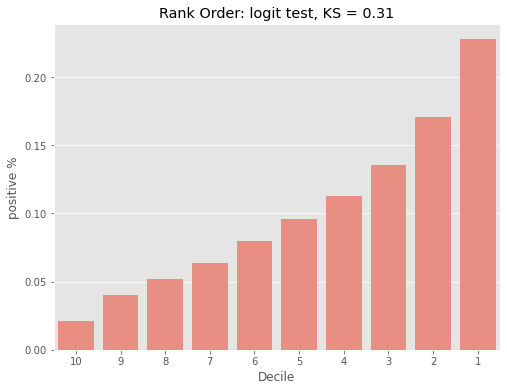

In [145]:
show_rankorder(y_test, y_pred_proba[:,1], 'logit test')

In [146]:
"""
If we assume that the train data can represent the true target distribution of the entire population, then without 
knowing any data information, a naive strategy of simply guessing all cases as positive will generate a precision 
value of 20.3% and recall value of 100%. Any model should beat the naive strategy otherwise it is not useful. For logit
model, we aim at getting a precision score of at least 50% and at the same time getting recall score as high as possible.

"""
y_train.value_counts(normalize = True)

0    0.797274
1    0.202726
Name: loan_status, dtype: float64

In [152]:
def threshold_finder(y_true, y_score, guardrail_value):
    max_recall = -float('Inf')
    final_precision = 0
    desired_threshold = None
    for p in range(0, 100):
        y_pred = np.array([int(y > p/100) for y in y_score])
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        if precision > guardrail_value and recall > max_recall:
            max_recall = recall
            desired_threshold = p/100
            final_precision = precision
    if desired_threshold != None:
        return (desired_threshold, final_precision, max_recall)
    print('threshold not found based on the given strategy!')

In [148]:
"""
precision and recall scores do not look good for both train and test data. The model is underfitting and fail to assign
positive cases (too many false negative). This may be due to the moderately imbalanced data (positive : negative = 1 : 4).
We may need to consider using some sampling techinques to handle it. But for now, let's use more complex models to see
how they will work. 
"""
desired_threshold, final_precision, max_recall = threshold_finder(y_train, y_train_pred_proba[:,1], 0.5)
print(desired_threshold)
print(final_precision)
print(max_recall)


0.43
0.5046654907073651
0.15347835551685532


In [149]:
y_pred = np.array([int(y > desired_threshold) for y in y_pred_proba[:,1]])
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.5000389681240746
0.14964431486880467


### 3.2 Gradient Boosting Machine

In [196]:
from sklearn.ensemble import GradientBoostingClassifier

In [152]:
%time gbm_accuracy0 = cross_val_score(X_train, y_train, 5, GradientBoostingClassifier, 'accuracy')
%time gbm_auc0 = cross_val_score(X_train, y_train, 5, GradientBoostingClassifier, 'roc_auc')
print('train accuracy of gbm at round 0: ' + str(round(gbm_accuracy0, 3)))
print('train auc of gbm at round 0: ' + str(round(gbm_auc0, 3)))

CPU times: user 12min 25s, sys: 9.12 s, total: 12min 34s
Wall time: 12min 39s
CPU times: user 12min 29s, sys: 9.9 s, total: 12min 39s
Wall time: 12min 45s
train accuracy of gbm at round 0: 0.801
train auc of gbm at round 0: 0.714


In [153]:
param_grid = {'learning_rate':[0.01, 0.05, 0.1, 0.2],
              'max_depth':[2, 4, 6]}
gbm_clf = GradientBoostingClassifier(random_state = 123, 
                                     validation_fraction = 0.2, n_iter_no_change = 10)

%time best_clf, best_params, tr_score, te_score, y_pred, y_pred_proba = \
SearchFit(X_train, y_train, X_test, y_test, 5, gbm_clf, 'roc_auc', param_grid)


CPU times: user 3h 57min 37s, sys: 1min 40s, total: 3h 59min 18s
Wall time: 4h 1min 52s


In [154]:
# looks like best performance is achived at the largest learning rate and max_depth, model may still be underfitting
# since that is the upper boundary of our search grid
best_params

{'learning_rate': 0.2, 'max_depth': 6}

In [155]:
print('train auc of gbm at round 1: ' + str(round(tr_score, 3)))
print('test auc of gbm at round 1: ' + str(round(te_score, 3)))

train auc of gbm at round 1: 0.723
test auc of gbm at round 1: 0.726


In [199]:
# we try slightly larger learning rate and max_depth to see if validation score can be improved
kwargs = {'random_state': 123, 'learning_rate': 0.25, 'max_depth': 8,
         'validation_fraction': 0.2, 'n_iter_no_change': 10}
%time auc_score2 = cross_val_score(X_train, y_train, 5, GradientBoostingClassifier, 'roc_auc', **kwargs)

CPU times: user 13min 8s, sys: 6.91 s, total: 13min 15s
Wall time: 13min 23s


In [201]:
# validation score is no better than previous cross-validation, so we will stick with the best params chosen
# by the previous cross validation
print(auc_score2)

0.7190503469468841


In [197]:
gbm_clf = GradientBoostingClassifier(learning_rate = 0.2, max_depth = 6, 
                                     validation_fraction = 0.2, n_iter_no_change = 10, random_state = 123)
gbm_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=6, n_iter_no_change=10,
                           random_state=123, validation_fraction=0.2)

In [198]:
roc_auc_score(y_train, gbm_clf.predict_proba(X_train)[:,1])

0.7453574300514506

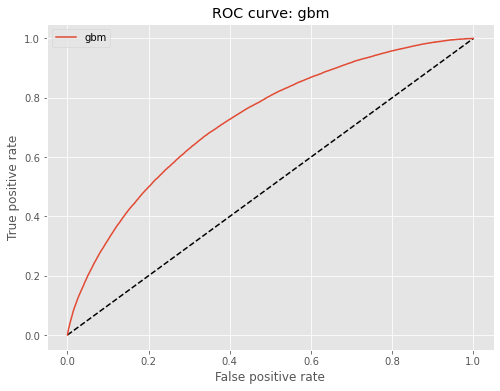

In [178]:
plot_roc(y_test, y_pred_proba[:,1], 'gbm')

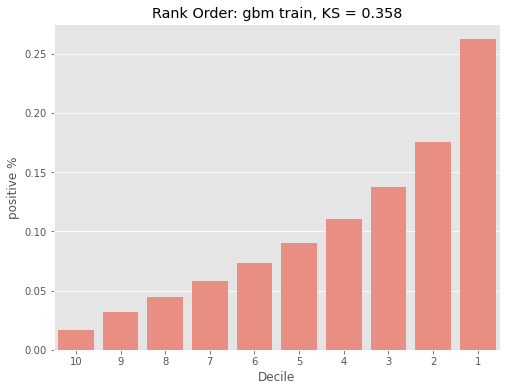

In [179]:
y_train_pred_proba = best_clf.predict_proba(X_train)

show_rankorder(y_train, y_train_pred_proba[:,1], 'gbm train')

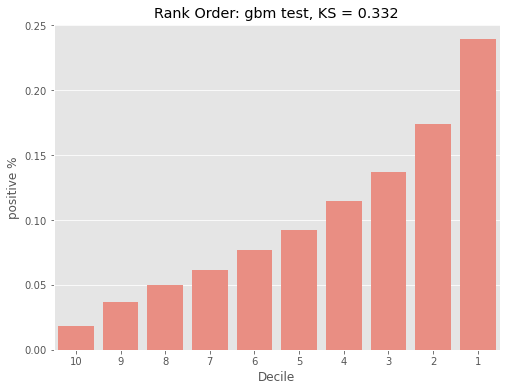

In [180]:
show_rankorder(y_test, y_pred_proba[:,1], 'gbm test')

In [195]:
desired_threshold, final_precision, max_recall = threshold_finder(y_train, y_train_pred_proba[:,1], 0.5)
print('the threshold determined using gbm = ' + str(desired_threshold))
print('the train precision score determined using gbm = ' + str(round(final_precision, 3)))
print('the train recall score determined using gbm = ' + str(round(max_recall, 3)))

the threshold determined using gbm = 0.37
the train precision score determined using gbm = 0.506
the train recall score determined using gbm = 0.308


In [200]:
y_pred = np.array([int(y > desired_threshold) for y in y_pred_proba[:,1]])
print('the test precision score determined using gbm = ' + str(round(precision_score(y_test, y_pred), 3)))
print('the test recall score determined using gbm = ' + str(round(recall_score(y_test, y_pred), 3)))

the test precision score determined using gbm = 0.467
the test recall score determined using gbm = 0.281


### 3.3 Extreme Gradient Boosting

In [135]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

In [142]:
# initialize the hyperparameters with default values
params = {'max_depth': 10,
          'learning_rate': 0.05,
          'min_child_weight': 2,
          'subsample': 1,
          'colsample_bytree': 1,
          'seed': 123,
          'eval_metric': ['auc', 'logloss'],
          'objective':'binary:logistic'}

In [231]:
num_rounds = 500
%time cv_results0 = xgb.cv(params, dtrain, num_boost_round = num_rounds, nfold = 5, \
                           stratified = True, metrics = ['auc', 'logloss'])

CPU times: user 5h 27min 16s, sys: 7min 53s, total: 5h 35min 9s
Wall time: 46min 48s


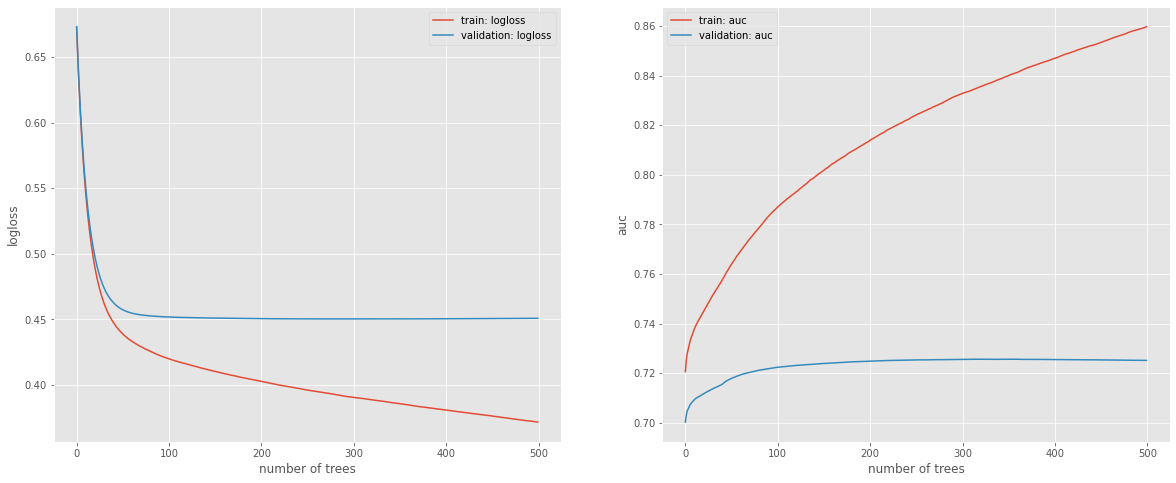

In [240]:
matplotlib.rcParams['figure.figsize'] = 20, 8
train_logloss = cv_results0['train-logloss-mean']
train_auc = cv_results0['train-auc-mean']
test_logloss = cv_results0['test-logloss-mean']
test_auc = cv_results0['test-auc-mean']

plt.subplot(121)
plt.plot(train_logloss, label = 'train: logloss')
plt.plot(test_logloss, label = 'validation: logloss')
plt.xlabel('number of trees')
plt.ylabel('logloss')
plt.legend()

plt.subplot(122)
plt.plot(train_auc, label = 'train: auc')
plt.plot(test_auc, label = 'validation: auc')
plt.xlabel('number of trees')
plt.ylabel('auc')
plt.legend()
plt.show()

In [246]:
print('best validation score is achived at round = ' + str(cv_results0['test-auc-mean'].argmax()))
print('best validation score = ' + str(cv_results0['test-auc-mean'].max()))

best validation score is achived at round = 316
best validation score = 0.7256354


In [143]:
best_auc = -float('Inf')
best_params = None
num_rounds = 500
params['learning_rate'] = 0.1
params_grid = [(max_depth, min_child_weight) for max_depth in [10, 12, 14] for min_child_weight in [5, 7, 9]]

for max_depth, min_child_weight in params_grid:
    print('CV with max_depth = ' + str(max_depth) + ', min_child_weight = ' + str(min_child_weight))
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    %time cv_results = xgb.cv(params, dtrain, num_boost_round = num_rounds, nfold = 5, \
                         stratified = True, metrics = ['auc'], early_stopping_rounds = 10, seed = 123)
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].argmax()
    print('max auc = ' + str(mean_auc) + ' achieved at round = ' + str(boost_rounds))
    if mean_auc > best_auc:
        best_auc = mean_auc
        best_params = (max_depth, min_child_weight)
print('best auc = ' + str(best_auc))
print('best params: max_depth = ' + str(best_params[0]) + ' min_child_weight = ' + str(best_params[1])) 

CV with max_depth = 10, min_child_weight = 5
CPU times: user 1h 40min 36s, sys: 59.3 s, total: 1h 41min 35s
Wall time: 12min 55s
max auc = 0.7247180000000001 achieved at round = 140
CV with max_depth = 10, min_child_weight = 7
CPU times: user 1h 37min 13s, sys: 55.2 s, total: 1h 38min 8s
Wall time: 12min 28s
max auc = 0.7251108 achieved at round = 132
CV with max_depth = 10, min_child_weight = 9
CPU times: user 1h 39min 52s, sys: 1min 5s, total: 1h 40min 57s
Wall time: 12min 52s
max auc = 0.7253288 achieved at round = 138
CV with max_depth = 12, min_child_weight = 5
CPU times: user 1h 32min 20s, sys: 51.9 s, total: 1h 33min 12s
Wall time: 11min 50s
max auc = 0.7216334000000001 achieved at round = 100
CV with max_depth = 12, min_child_weight = 7
CPU times: user 1h 39min 56s, sys: 56.7 s, total: 1h 40min 52s
Wall time: 12min 49s
max auc = 0.7223312 achieved at round = 110
CV with max_depth = 12, min_child_weight = 9
CPU times: user 1h 38min 19s, sys: 56 s, total: 1h 39min 15s
Wall time: 

In [144]:
params['max_depth'] = 10
params['min_child_weight'] = 9
best_auc = -float('Inf')
best_params = None
params_grid = [(subsample, colsample_bytree) for subsample in [0.6, 0.7, 0.8] for colsample_bytree in [0.5, 0.6, 0.7]]

for subsample, colsample_bytree in params_grid:
    print('CV with subsample = ' + str(subsample) + ', colsample_bytree = ' + str(colsample_bytree))
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample_bytree
    
    %time cv_results = xgb.cv(params, dtrain, num_boost_round = num_rounds, nfold = 5, \
                         stratified = True, metrics = ['auc'], early_stopping_rounds = 10, seed = 123)
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].argmax()
    print('max auc = ' + str(mean_auc) + ' achieved at round = ' + str(boost_rounds))
    if mean_auc > best_auc:
        best_auc = mean_auc
        best_params = (subsample, colsample_bytree)
print('best auc = ' + str(best_auc))
print('best params: subsample = ' + str(best_params[0]) + ' colsample_bytree = ' + str(best_params[1]))

CV with subsample = 0.6, colsample_bytree = 0.5
CPU times: user 54min 22s, sys: 1min, total: 55min 23s
Wall time: 7min 15s
max auc = 0.7240949999999999 achieved at round = 141
CV with subsample = 0.6, colsample_bytree = 0.6
CPU times: user 59min 9s, sys: 1min 1s, total: 1h 10s
Wall time: 7min 53s
max auc = 0.7237716000000001 achieved at round = 125
CV with subsample = 0.6, colsample_bytree = 0.7
CPU times: user 1h 13min 32s, sys: 49.5 s, total: 1h 14min 21s
Wall time: 9min 29s
max auc = 0.7242658000000001 achieved at round = 141
CV with subsample = 0.7, colsample_bytree = 0.5
CPU times: user 54min 24s, sys: 33.8 s, total: 54min 58s
Wall time: 6min 59s
max auc = 0.7251904 achieved at round = 133
CV with subsample = 0.7, colsample_bytree = 0.6
CPU times: user 1h 4min 43s, sys: 40.3 s, total: 1h 5min 23s
Wall time: 8min 18s
max auc = 0.7245005999999999 achieved at round = 133
CV with subsample = 0.7, colsample_bytree = 0.7
CPU times: user 1h 15min 36s, sys: 47.2 s, total: 1h 16min 23s
Wal

In [148]:
params['subsample'] = 0.8
params['colsample_bytree'] = 0.5
params['eval_metric'] = 'auc'
best_auc = -float('Inf')
best_params = None
params_grid = [0.01, 0.02, 0.05, 0.2]

for learning_rate in params_grid:
    print('CV with learning rate = ' + str(learning_rate))
    params['learning_rate'] = learning_rate
    
    %time cv_results = xgb.cv(params, dtrain, num_boost_round = num_rounds, nfold = 5, \
                         stratified = True, metrics = ['auc'], early_stopping_rounds = 10, seed = 123)
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].argmax()
    print('max auc = ' + str(mean_auc) + ' achieved at round = ' + str(boost_rounds))
    if mean_auc > best_auc:
        best_auc = mean_auc
        best_params = learning_rate
print('best auc = ' + str(best_auc))
print('best params: learning_rate = ' + str(best_params))

CV with learning rate = 0.01
CPU times: user 3h 25min 7s, sys: 7min 9s, total: 3h 32min 17s
Wall time: 29min 26s
max auc = 0.7238131999999999 achieved at round = 499
CV with learning rate = 0.02
CPU times: user 3h 22min 4s, sys: 8min 43s, total: 3h 30min 47s
Wall time: 30min 35s
max auc = 0.7274564000000001 achieved at round = 499
CV with learning rate = 0.05
CPU times: user 2h 12min 57s, sys: 5min 43s, total: 2h 18min 41s
Wall time: 20min 27s
max auc = 0.7277116000000001 achieved at round = 325
CV with learning rate = 0.2
CPU times: user 24min 25s, sys: 1min 38s, total: 26min 4s
Wall time: 4min 36s
max auc = 0.7218712 achieved at round = 54
best auc = 0.7277116000000001
best params: learning_rate = 0.05


In [150]:
params['learning_rate'] = 0.05

In [152]:
params

{'max_depth': 10,
 'learning_rate': 0.05,
 'min_child_weight': 9,
 'subsample': 0.8,
 'colsample_bytree': 0.5,
 'seed': 123,
 'eval_metric': 'auc',
 'objective': 'binary:logistic'}

In [136]:
params = {'max_depth': 10,
          'learning_rate': 0.05,
          'min_child_weight': 9,
          'subsample': 0.8,
          'colsample_bytree': 0.5,
          'seed': 123,
          'eval_metric': 'auc',
          'objective':'binary:logistic'}

In [137]:
watchlist = [(dtest, 'test'),(dtrain, 'train')]
res = dict()

%time bst = xgb.train(params, dtrain, num_boost_round = 500, early_stopping_rounds = 10, \
               verbose_eval = 30, evals = watchlist, evals_result = res)

[0]	test-auc:0.69522	train-auc:0.70152
[30]	test-auc:0.71665	train-auc:0.73556
[60]	test-auc:0.72143	train-auc:0.74705
[90]	test-auc:0.72343	train-auc:0.75555
[120]	test-auc:0.72493	train-auc:0.76380
[150]	test-auc:0.72602	train-auc:0.77108
[180]	test-auc:0.72743	train-auc:0.77832
[210]	test-auc:0.72842	train-auc:0.78414
[240]	test-auc:0.72910	train-auc:0.78962
[270]	test-auc:0.72930	train-auc:0.79394
[300]	test-auc:0.72964	train-auc:0.79821
[330]	test-auc:0.72983	train-auc:0.80139
[360]	test-auc:0.72989	train-auc:0.80495
[390]	test-auc:0.72994	train-auc:0.80798
[420]	test-auc:0.72993	train-auc:0.81081
[450]	test-auc:0.72989	train-auc:0.81317
[480]	test-auc:0.72985	train-auc:0.81588
[499]	test-auc:0.72982	train-auc:0.81759
CPU times: user 46min 35s, sys: 2min 17s, total: 48min 53s
Wall time: 7min 37s


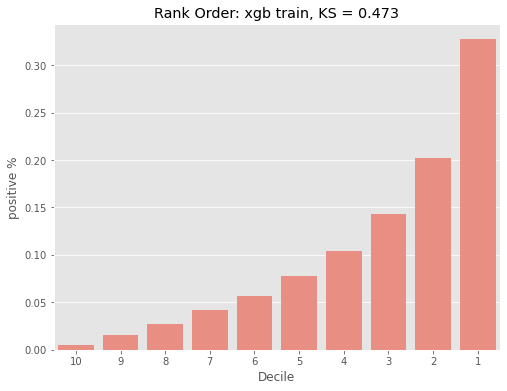

In [167]:
y_train_pred = bst.predict(dtrain)
y_test_pred = bst.predict(dtest)
show_rankorder(y_train, y_train_pred, 'xgb train')

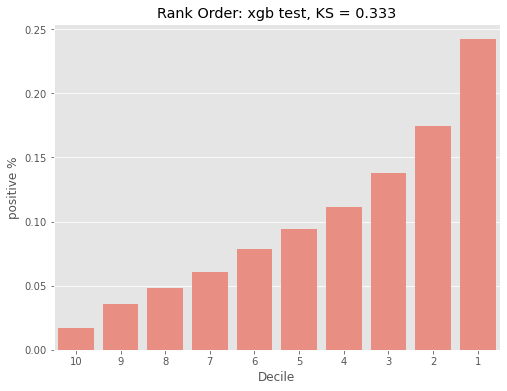

In [168]:
show_rankorder(y_test, y_test_pred, 'xgb test')

In [173]:
desired_threshold, final_precision, max_recall = threshold_finder(y_train, y_train_pred, 0.5)
print('the threshold determined using xgb = ' + str(desired_threshold))
print('the train precision score determined using xgb = ' + str(round(final_precision, 3)))
print('the train recall score determined using xgb = ' + str(round(max_recall, 3)))

the threshold determined using xgb = 0.29
the train precision score determined using xgb = 0.51
the train recall score determined using xgb = 0.577


In [183]:
y_test_pred = np.array([int(y > desired_threshold) for y in y_test_pred])
print('the test precision score determined using xgb = ' + str(round(precision_score(y_test, y_test_pred), 3)))
print('the test recall score determined using xgb = ' + str(round(recall_score(y_test, y_test_pred), 3)))

the test precision score determined using xgb = 0.408
the test recall score determined using xgb = 0.455


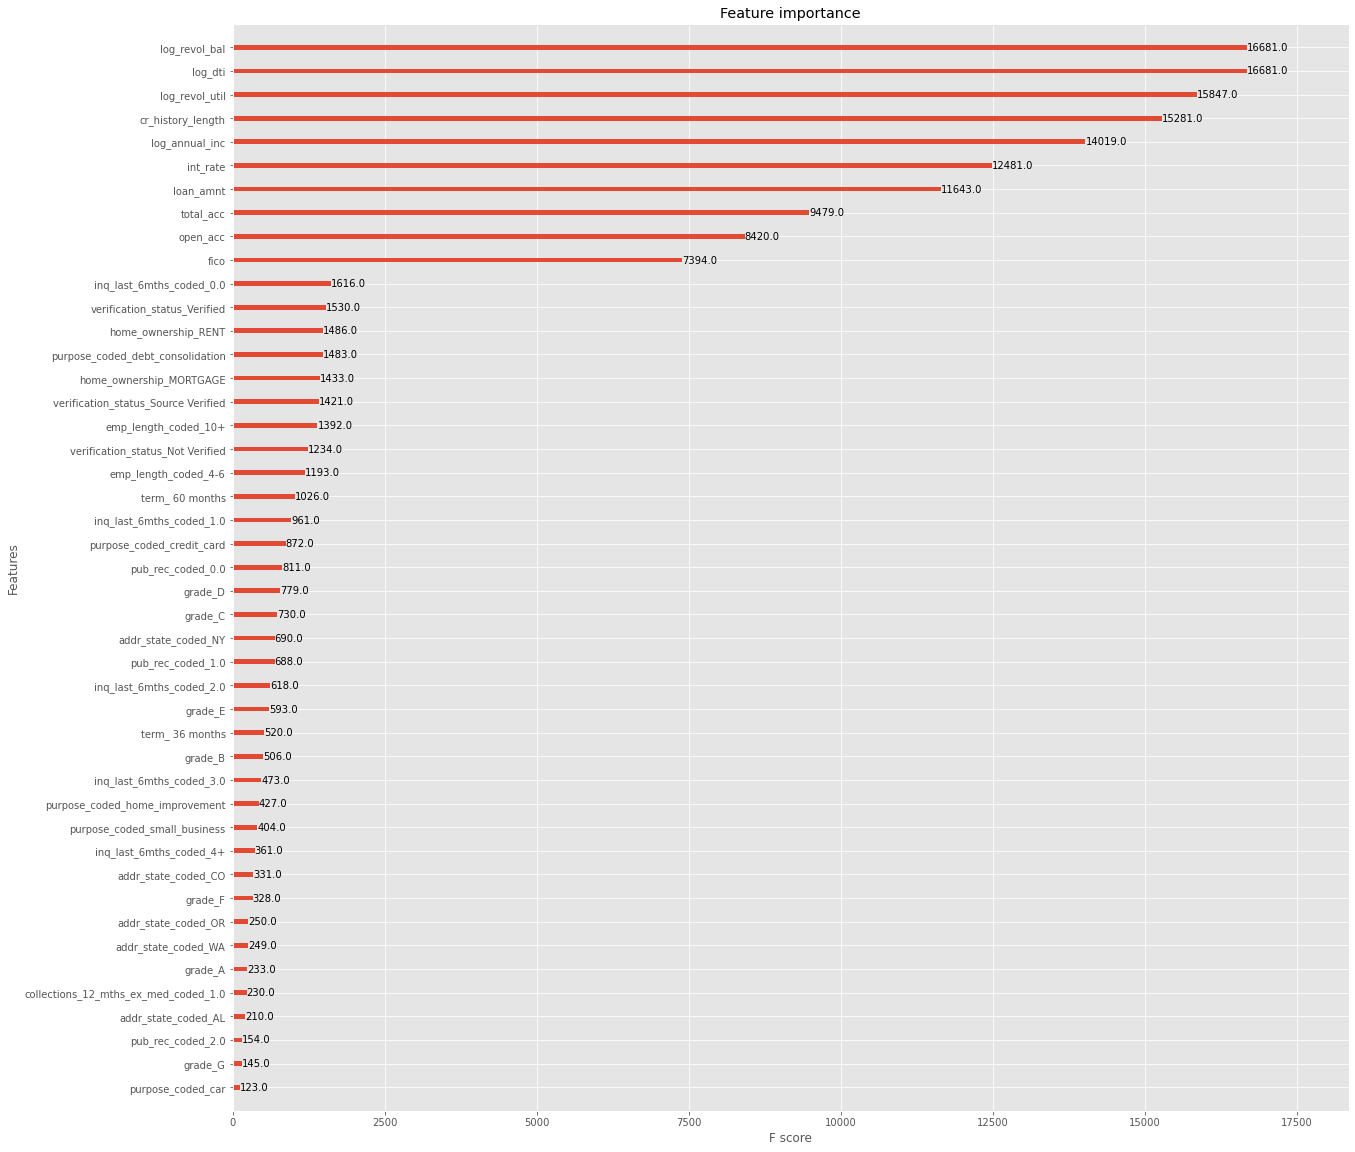

In [142]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(20,20))
plot_importance(bst, ax = ax, height = 0.2)
plt.show()

### 3.4 Light GBM

In [133]:
import lightgbm as lgb

In [134]:
train_set = lgb.Dataset(X_train, label = y_train)

In [135]:
lgb_params = {'max_depth': 12,
              'num_iterations': 500,
              'learning_rate': 0.05,
              'min_child_samples': 10,
              'colsample_bytree': 0.8,
              'metric': 'auc',
              'objective':'binary',
              'feature_pre_filter': False,
              'num_leaves': 80,
              'lambda_l2': 0.2,
              'force_row_wise': True}

In [136]:
%time cv_lgb = lgb.cv(params = lgb_params, train_set = train_set, eval_train_metric = True)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 102899, number of negative: 404679
[LightGBM] [Info] Total Bins 2059
[LightGBM] [Info] Number of data points in the train set: 507578, number of used features: 45
[LightGBM] [Info] Number of positive: 102899, number of negative: 404679
[LightGBM] [Info] Total Bins 2059
[LightGBM] [Info] Number of data points in the train set: 507578, number of used features: 45
[LightGBM] [Info] Number of positive: 102899, number of negative: 404679
[LightGBM] [Info] Total Bins 2059
[LightGBM] [Info] Number of data points in the train set: 507578, number of used features: 45
[LightGBM] [Info] Number of positive: 102900, number of negative: 404679
[LightGBM] [Info] Total Bins 2059
[LightGBM] [Info] Number of data points in the train set: 507579, number of used features: 45
[LightGBM] [Info] Number of positive: 102899, number of negative: 404680
[LightGBM] [Info] Total Bins 2059
[LightGBM

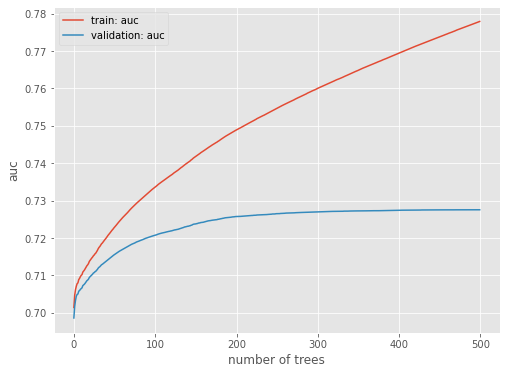

In [137]:
train_score = cv_lgb['train auc-mean']
val_score = cv_lgb['valid auc-mean']

plt.plot(train_score, label = 'train: auc')
plt.plot(val_score, label = 'validation: auc')
plt.xlabel('number of trees')
plt.ylabel('auc')
plt.legend()
plt.show()

In [139]:
best_auc = -float('Inf')
best_params = None
params_grid = [(max_depth, min_child_samples, num_leaves) 
               for max_depth in [10, 12, 14] for min_child_samples in [10, 20, 30] for num_leaves in [70, 80, 90]]
lgb_params['verbose'] = -1
lgb_params['num_iterations'] = 400
for max_depth, min_child_samples, num_leaves in params_grid:
    print('CV with max_depth = ' + str(max_depth) + ', min_child_samples = ' + str(min_child_samples) + \
         ', num_leaves = ' + str(num_leaves))
    lgb_params['max_depth'] = max_depth
    lgb_params['min_child_samples'] = min_child_samples
    lgb_params['num_leaves'] = num_leaves
    
    %time cv_results = lgb.cv(params = lgb_params, train_set = train_set, early_stopping_rounds = 10)
    mean_auc = np.max(cv_results['auc-mean'])
    boost_rounds = np.argmax(cv_results['auc-mean'])
    print('max auc = ' + str(mean_auc) + ' achieved at round = ' + str(boost_rounds + 1))
    if mean_auc > best_auc:
        best_auc = mean_auc
        best_params = (max_depth, min_child_samples, num_leaves)
print('best auc = ' + str(best_auc))
print('best params: max_depth = ' + str(best_params[0]) + ' min_child_samples = ' + str(best_params[1]) + \
      ' num_leaves = ' + str(best_params[2])) 

CV with max_depth = 10, min_child_samples = 10, num_leaves = 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202727 -> initscore=-1.369337
[LightGBM] [Info] Start training from score -1.369337
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369349
[LightGBM] [Info] Start training from score -1.369349
CPU times: user 6min 9s, sys: 13.7 s, total: 6min 22s
Wall time: 54.5 s
max auc = 0.7275069697377835 achieved at round = 400
CV with max_depth = 10, min_child_samples = 10, num_leaves = 80
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.3693

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
CPU times: user 6min 52s, sys: 16.8 s, total: 7min 9s
Wall time: 1min
max auc = 0.7277272951050204 achieved at round = 386
CV with max_depth = 12, min_child_samples = 10, num_leaves = 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Inf

CPU times: user 6min 33s, sys: 12.2 s, total: 6min 45s
Wall time: 56.6 s
max auc = 0.7275233427054416 achieved at round = 360
CV with max_depth = 14, min_child_samples = 10, num_leaves = 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202727 -> initscore=-1.369337
[LightGBM] [Info] Start training from score -1.369337
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369349
[LightGBM] [Info] Start training from score -1.369349
CPU times: user 6min 24s, sys: 13.2 s, total: 6min 37s
Wall time: 56.6 s
max auc = 0.7274164299492037 achieved at round = 393
CV with max_de

In [140]:
lgb_params['max_depth'] = 10
lgb_params['min_child_samples'] = 30
lgb_params['num_leaves'] = 80    

In [141]:
params_grid = [(colsample_bytree, lambda_l2) 
               for colsample_bytree in [0.6, 0.7, 0.8, 0.9] for lambda_l2 in [0.1, 0.2, 0.3, 0.4]]

for colsample_bytree, lambda_l2 in params_grid:
    print('CV with colsample_bytree = ' + str(colsample_bytree) + ', lambda_l2 = ' + str(lambda_l2))
    lgb_params['colsample_bytree'] = colsample_bytree
    lgb_params['lambda_l2'] = lambda_l2
    
    %time cv_results = lgb.cv(params = lgb_params, train_set = train_set, early_stopping_rounds = 10)
    mean_auc = np.max(cv_results['auc-mean'])
    boost_rounds = np.argmax(cv_results['auc-mean'])
    print('max auc = ' + str(mean_auc) + ' achieved at round = ' + str(boost_rounds + 1))
    if mean_auc > best_auc:
        best_auc = mean_auc
        best_params = (colsample_bytree, lambda_l2)
print('best auc = ' + str(best_auc))
print('best params: colsample_bytree = ' + str(best_params[0]) + ' lambda_l2 = ' + str(best_params[1])) 

CV with colsample_bytree = 0.6, lambda_l2 = 0.1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202727 -> initscore=-1.369337
[LightGBM] [Info] Start training from score -1.369337
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369349
[LightGBM] [Info] Start training from score -1.369349
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
CPU times: user 6min 35s, sys: 7.96 s, total: 6min 43s
Wall time: 52.6 s
max auc = 0.7280647984958748 achieved at round = 399
CV with colsample_bytree = 0.8, lambda_l2 = 0.1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202727 -> initscore=-1.369337
[LightGBM] [Info] Start training from score -1.369337
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> inits

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
CPU times: user 6min 53s, sys: 19 s, total: 7min 12s
Wall time: 1min 3s
max auc = 0.7273926831375174 achieved at round = 399
CV with colsample_bytree = 0.9, lambda_l2 = 0.4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202727 -> initscore=-1.369337
[LightGBM] [Info] Start training from score -1.369337
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369349
[LightGBM] [Info] Start training from score -1.369349
[LightG

In [143]:
lgb_params['colsample_bytree'] = 0.6
lgb_params['lambda_l2'] = 0.2

In [144]:
params_grid = [(num_iterations, learning_rate) 
               for num_iterations in [300, 400, 500, 600] for learning_rate in [0.02, 0.05, 0.1, 0.15, 0.2]]

for num_iterations, learning_rate in params_grid:
    print('CV with num_iterations = ' + str(num_iterations) + ', learning_rate = ' + str(learning_rate))
    lgb_params['num_iterations'] = num_iterations
    lgb_params['learning_rate'] = learning_rate
    
    %time cv_results = lgb.cv(params = lgb_params, train_set = train_set, early_stopping_rounds = 10)
    mean_auc = np.max(cv_results['auc-mean'])
    boost_rounds = np.argmax(cv_results['auc-mean'])
    print('max auc = ' + str(mean_auc) + ' achieved at round = ' + str(boost_rounds + 1))
    if mean_auc > best_auc:
        best_auc = mean_auc
        best_params = (num_iterations, learning_rate)
print('best auc = ' + str(best_auc))
print('best params: num_iterations = ' + str(best_params[0]) + ' learning_rate = ' + str(best_params[1])) 

CV with num_iterations = 300, learning_rate = 0.02
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202727 -> initscore=-1.369337
[LightGBM] [Info] Start training from score -1.369337
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369349
[LightGBM] [Info] Start training from score -1.369349
CPU times: user 6min 2s, sys: 10.8 s, total: 6min 13s
Wall time: 49.6 s
max auc = 0.7221406716026891 achieved at round = 300
CV with num_iterations = 300, learning_rate = 0.05
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202727 -> initscore=-1.369337
[LightGBM] [Info] Start training from score -1.369337
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369349
[LightGBM] [Info] Start training from score -1.369349
CPU times: user 1min 42s, sys: 7.24 s, total: 1min 49s
Wall time: 17.3 s
max auc = 0.7255011093019956 achieved at round = 71
CV with num_iterations = 500, learning_rate = 0.02
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
CPU times: user 3min 45s, sys: 2.13 s, total: 3min 47s
Wall time: 28.8 s
max auc = 0.7273585208896309 achieved at round = 221
CV with num_iterations = 600, learning_rate = 0.15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369346
[LightGBM] [Info] Start training from score -1.369346
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202727 -> initscore=-1.369337
[LightGBM] [Info] Start training from score -1.369337
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202725 -> initscore=-1.369349
[LightGBM] [Info] Start training from score -1.369349
CPU

In [145]:
lgb_params['num_iterations'] = 500
lgb_params['learning_rate'] = 0.05
lgb_params

{'max_depth': 10,
 'num_iterations': 500,
 'learning_rate': 0.05,
 'min_child_samples': 30,
 'colsample_bytree': 0.6,
 'metric': 'auc',
 'objective': 'binary',
 'feature_pre_filter': False,
 'num_leaves': 80,
 'lambda_l2': 0.2,
 'force_row_wise': True,
 'verbose': -1}

In [147]:
%time lgb_model = lgb.train(params = lgb_params, train_set = train_set)

CPU times: user 1min 7s, sys: 1.18 s, total: 1min 8s
Wall time: 8.97 s


In [151]:
train_auc = roc_auc_score(y_train, lgb_model.predict(X_train))
test_auc = roc_auc_score(y_test, lgb_model.predict(X_test))
print(train_auc)
print(test_auc)

0.7654756034415687
0.7306382270818486


In [153]:
desired_threshold, final_precision, max_recall = threshold_finder(y_train, lgb_model.predict(X_train), 0.5)
print(desired_threshold)
print(final_precision)
print(max_recall)

0.35
0.5082521615409872
0.3610445950988929


In [154]:
y_pred = np.array([int(y > desired_threshold) for y in lgb_model.predict(X_test)])
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.456657581599415
0.32044314868804663


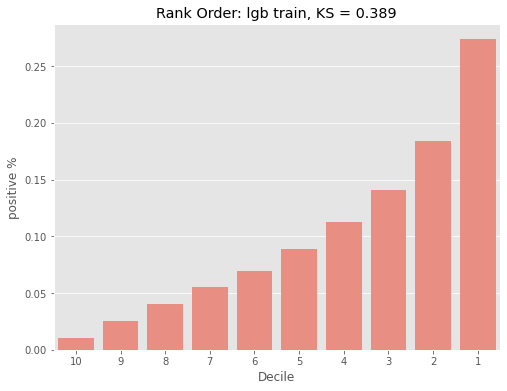

In [161]:
show_rankorder(y_train, lgb_model.predict(X_train), 'lgb train')

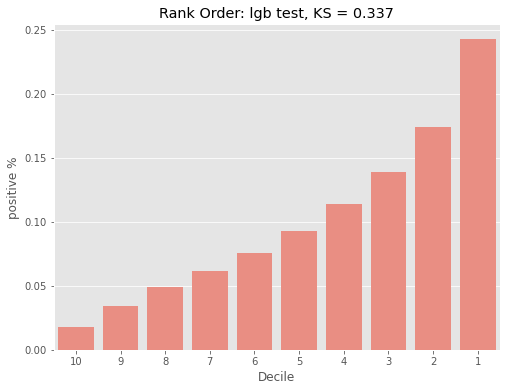

In [163]:
show_rankorder(y_test, lgb_model.predict(X_test), 'lgb test')

# 4.0 Evaluation Summary 

In [167]:
summary_array = [['Logit',0.712,0.712,0.713,str(0.505) + '/' + str(0.153),str(0.50) + '/' + str(0.150),0.43,'~' + str(5) + ' min', 26],
                 ['GBM',0.745,0.723,0.726,str(0.506) + '/' + str(0.308),str(0.467) + '/' + str(0.281),0.37,'~' + str(260) + ' min', 12],
                ['XGB',0.818,0.728,0.730,str(0.51) + '/' + str(0.577),str(0.408) + '/' + str(0.455),0.29,'~' + str(300) + ' min', 22],
                ['Lightgbm',0.765,0.729,0.731,str(0.508) + '/' + str(0.361),str(0.457) + '/' + str(0.320),0.35,'~' + str(60) + ' min', 63]]
summary = pd.DataFrame(summary_array, columns = ['Alogrithm', 'Train AUC', 'Validation AUC', 
                                                 'Test AUC', 'Train Precision/Recall', 'Test Precision/Recall',
                                                 'Threshold','Training Time', '# of Combinations Tuned'])
summary

,Alogrithm,Train AUC,Validation AUC,Test AUC,Train Precision/Recall,Test Precision/Recall,Threshold,Training Time,# of Combinations Tuned
0,Logit,0.712,0.712,0.713,0.505/0.153,0.5/0.15,0.43,~5 min,26
1,GBM,0.745,0.723,0.726,0.506/0.308,0.467/0.281,0.37,~260 min,12
2,XGB,0.818,0.728,0.730,0.51/0.577,0.408/0.455,0.29,~300 min,22
3,Lightgbm,0.765,0.729,0.731,0.508/0.361,0.457/0.32,0.35,~60 min,63


1. For logit, cross validation picked the largest C and L2, suggesting that the model may be underfitting, which can be supported by comparing the train auc and test auc. Logit algorithm may not be able to learn more information from the data.
2. For gbm, we tune max_depth and learning_rate for 12 possibilities. Other hyperparameters are fixed since the tuning process took too much time (~ 4 hours). Test auc and optimal precision/recall are improved marginally.
3. For xgb, due to its computational power, we are able to fine tune five hyperparameters (max_depth, min_child_weight, subsample, colsample_bytree, learning_rate) with 22 possibilities. Test auc is improved marginally but test recall is lifted significantly with a sight drop of test precision score. In the cross validation, we noticed that with small learning rate, the test score did not converge at 500 round of iterations.  
4. We then used light gbm and tuned fine-tuned 63 combinations of hyperparameters and achived roughly similar prediction performance as xgb but within much less time (about 1 hour). Notice that based on our defined optimal threshold, light gbm increases the test precision but lowers the test recall (if you calculate the F-1 score, it will be lower than using xgb). However, the test auc is roughly the same. The precision and recall values are just based on our pre-defined strategy of having at least 50% precision and as high as possible of recall on the training data. A different strategy may be used depending on the business, so the test auc should be the primary metric used to evaluate the model performance. Given the computational power of light gbm, we may later on explore more granular search on the hyperparameters to get even better results.
6. Notice that the test auc score is improved by not much by light gbm compared with the baseline (logit model), but light gbm training time is ~12 times longer than baseline. At this point, we will decide to choose light gbm as the final model. But for further enhancements, we should go back to see if the data we used for training is representative and complete enough for training (after all, we only selected a small portion of variables from ~150 variables provided, and the model may not be able to learn a lot from the small portion of variables).

# 5.0 Further Enhancements

1. The targe variable is moderately imbalanced (positive:negative = 1:4), we can consider SMOTE to resample the data before training.
2. Variable addr_state has too many levels, instead of one-hot encoding and feature selection, we can consider applying mean encoding with cross validation to convert the variable to a numerical variable. 
3. Now the training data only includes those applicants who were accepted, which can create bias when predicting the default rate. We also need to consider features of applicants who were rejected, and infer their labels accordingly (reject inference). 
4. We also need to leave out an out-of-time sample to validate the model performance over time.
5. Conider adding more variables to the training set. 